In [ ]:
## first softmax version
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.special import expit
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
# Cell 1: Import the module
from gp_softmax_torch_works_play_matrprev import *
#from gp_softmax_torch_works_play_matrprev_old import *
## first softmax version
%load_ext autoreload
%autoreload 2
# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)
from scipy.sparse.linalg import svds

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# Generate synthetic data
N = 100  # Number of individuals
D = 5    # Number of diseases
T = 50   # Number of time points
K = 3    # Number of topics
P = 5    # Number of genetic covariates
torch.manual_seed(42)
np.random.seed(42)
# 1. Generate synthetic data with true parameters
true_data = generate_synthetic_data(N=N, D=D, T=T, K=K, P=P, return_true_params=True)
Y = true_data['Y']
G = true_data['G']
prevalence_t = compute_smoothed_prevalence(Y, window_size=5)
event_times = true_data['event_times']
true_pi = true_data['pi']


In [ ]:
prevalence_t.shape

(5, 50)

In [ ]:

# Verify the shapes
print("Model shapes:")
print(f"lambda_: {model.lambda_.shape}")  # Should be (N x K x T)
print(f"phi: {model.phi.shape}")         # Should be (K x D x T)
print(f"gamma: {model.gamma.shape}")     # Should be (P x K)

Model shapes:
lambda_: torch.Size([100, 3, 50])
phi: torch.Size([3, 5, 50])
gamma: torch.Size([5, 3])


In [ ]:

# Initialize the model
model = AladynSurvivalModel(N, D, T, K, P, G, Y, prevalence_t)


In [ ]:
# Initialize model
model = AladynSurvivalModel(N, D, T, K, P, G, Y, prevalence_t)

E_tensor = event_times = torch.tensor(event_times, dtype=torch.float32)

# Fit model
losses = model.fit(
    event_times=E_tensor,
    num_epochs=1000,
    learning_rate=5e-4
)


TypeError: fit() got an unexpected keyword argument 'num_epochs'

/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_13456/773261307.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  E_tensor = event_times = torch.tensor(event_times, dtype=torch.float32)
/Users/sarahurbut/aladynoulli/pyScripts/gp_softmax_torch_works_play_matrprev.py:164: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
/opt/miniconda3/envs/pyro_env/lib/python3.9/site-packages/torch/amp/grad_scaler.py:132: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
/Users/sarahurbut/aladynoulli/pyScripts/gp_softmax_torch_works_play_matrprev.py:174: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with aut

Epoch 0, Loss: 9842.2529
Epoch 10, Loss: 3919.9585
Epoch 20, Loss: 3110.6357
Epoch 30, Loss: 2946.8074
Epoch 40, Loss: 2824.7371
Epoch 50, Loss: 2757.6428
Epoch 60, Loss: 2719.5271
Epoch 70, Loss: 2690.2859
Epoch 80, Loss: 2665.3586
Epoch 90, Loss: 2642.7402
Epoch 100, Loss: 2621.6157
Epoch 110, Loss: 2601.7517
Epoch 120, Loss: 2583.0029
Epoch 130, Loss: 2565.2856
Epoch 140, Loss: 2548.5195
Epoch 150, Loss: 2532.6318
Epoch 160, Loss: 2517.5562
Epoch 170, Loss: 2503.2266
Epoch 180, Loss: 2489.5830
Epoch 190, Loss: 2476.5676
Epoch 200, Loss: 2464.1301
Epoch 210, Loss: 2452.2217
Epoch 220, Loss: 2440.8000
Epoch 230, Loss: 2429.8257
Epoch 240, Loss: 2419.2632
Epoch 250, Loss: 2409.0815
Epoch 260, Loss: 2399.2517
Epoch 270, Loss: 2389.7490
Epoch 280, Loss: 2380.5503
Epoch 290, Loss: 2371.6357
Epoch 300, Loss: 2362.9866
Epoch 310, Loss: 2354.5862
Epoch 320, Loss: 2346.4202
Epoch 330, Loss: 2338.4753
Epoch 340, Loss: 2330.7393
Epoch 350, Loss: 2323.2014
Epoch 360, Loss: 2315.8516
Epoch 370, L

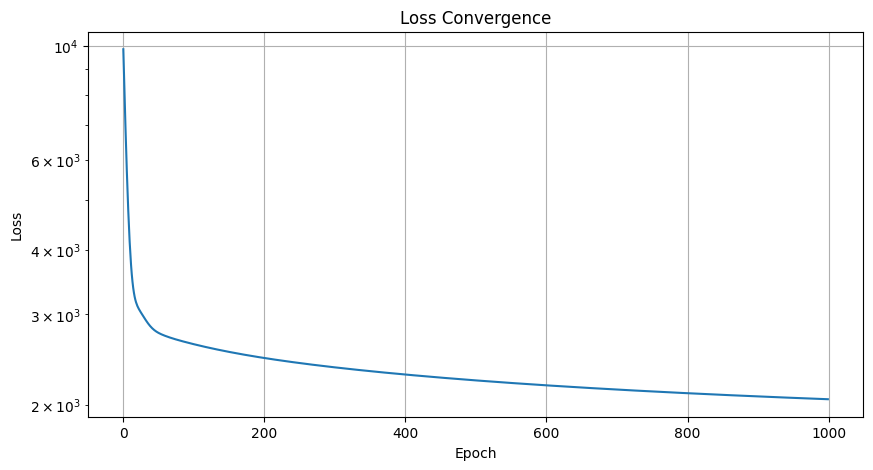

Final loss: 2048.3853


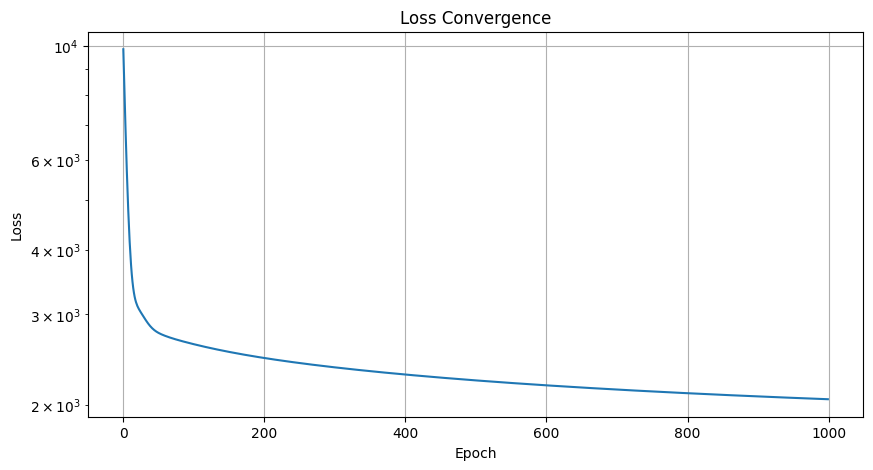

In [ ]:
E_tensor = event_times = torch.tensor(event_times, dtype=torch.float32)

# Train model with convergence-based stopping
loss_history = model.fit(
    event_times,
    learning_rate=1e-3,
    patience=10,        # Stop if no improvement for 10 epochs
    min_delta=1e-4,    # Minimum improvement threshold
    max_epochs=1000    # Maximum number of epochs as a safeguard
)

# Get predictions
pi_pred, theta_pred, phi_pred = model.forward()

# Print final loss
print(f"Final loss: {loss_history[-1]:.4f}")

# Plot loss convergence
plt.figure(figsize=(10, 5))
plt.plot(loss_history)
plt.title('Loss Convergence')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')
plt.grid(True)
plt.show()



## consider putting prior on the kerenl


In [ ]:

# 4. Get model predictions
pi_pred, theta_pred, phi_pred = model.forward()



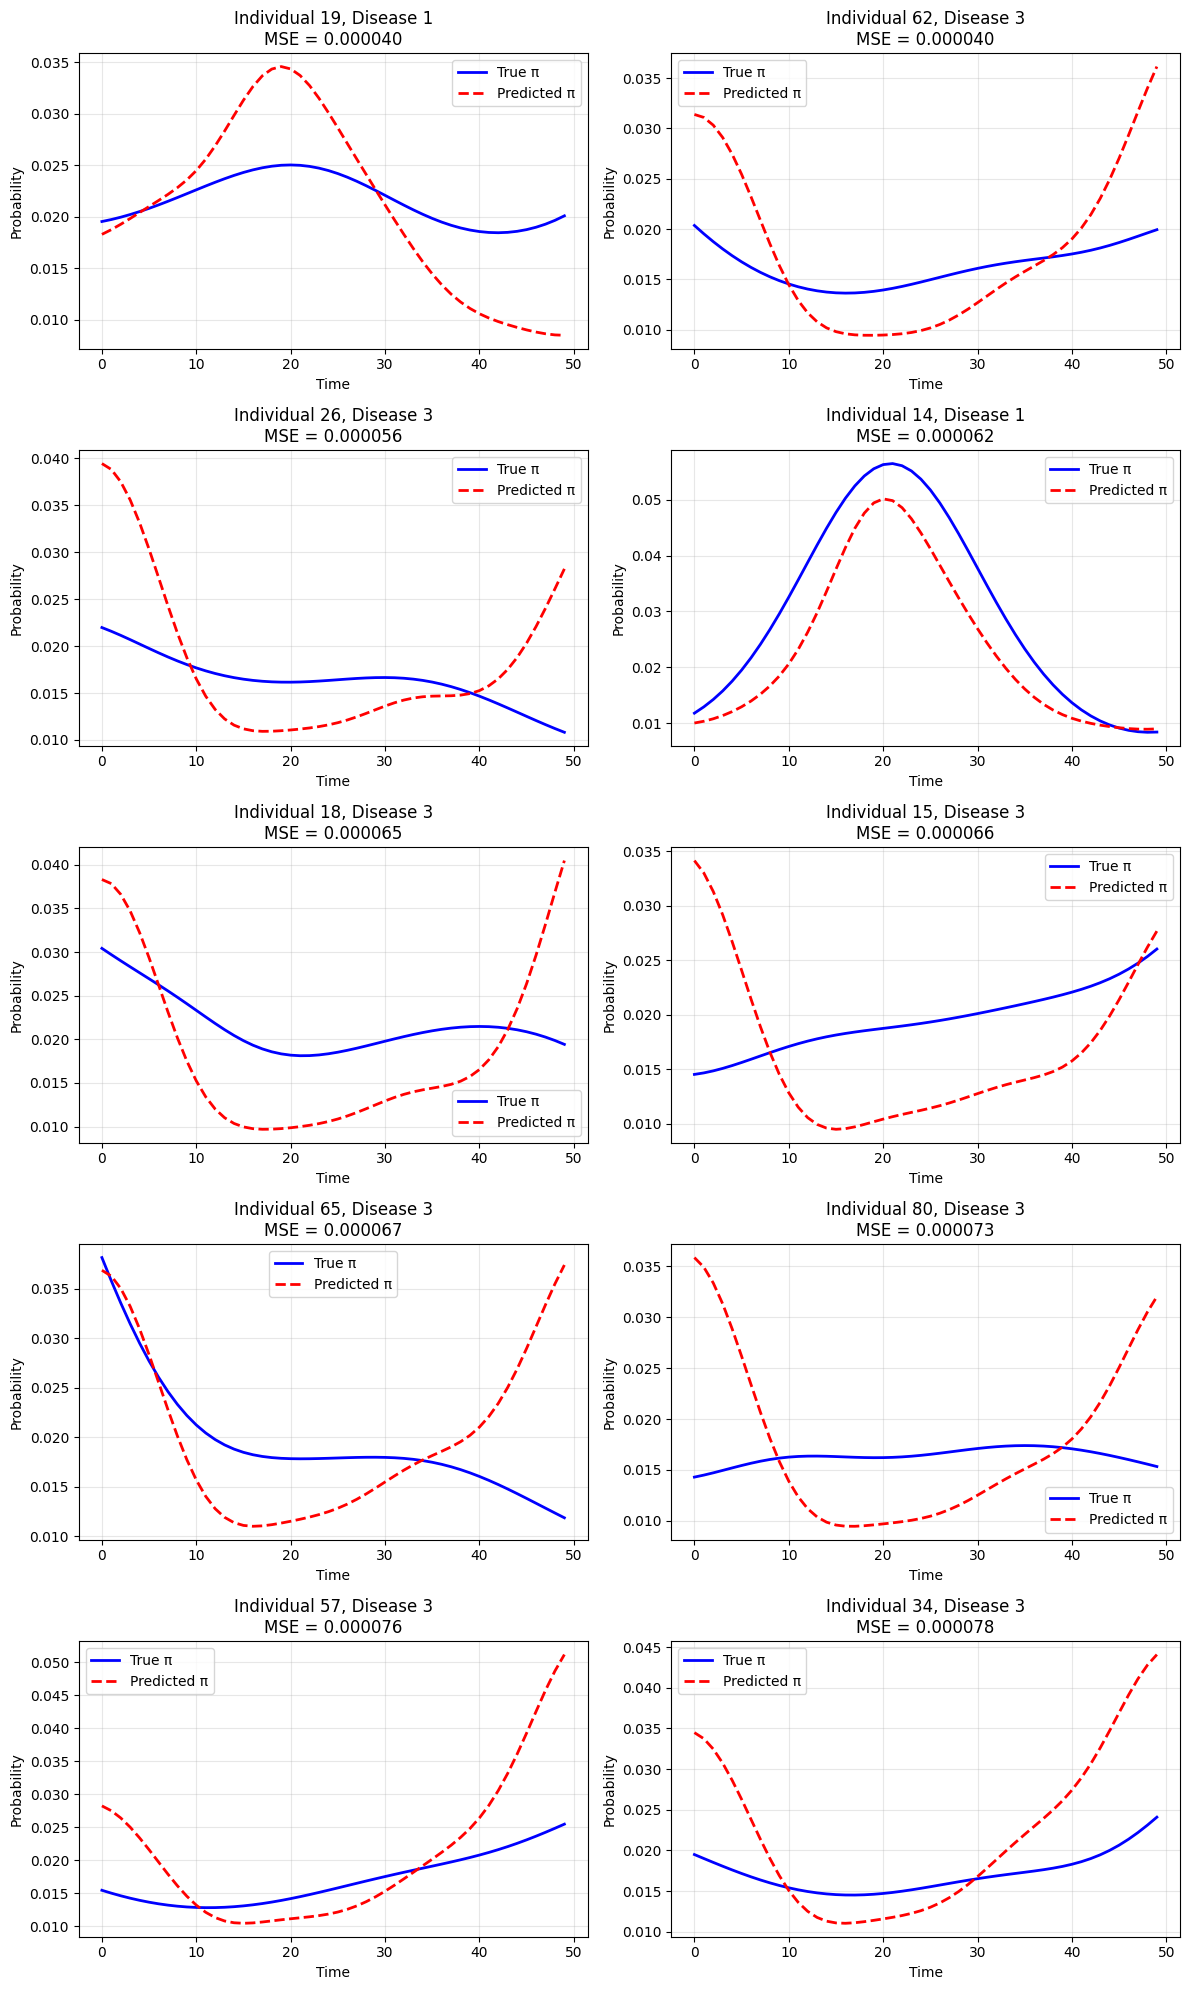

In [ ]:

pi_pred, theta_pred, phi_pred = model.forward()
plot_best_matches(true_pi, pi_pred, n_samples=10, n_cols=2)


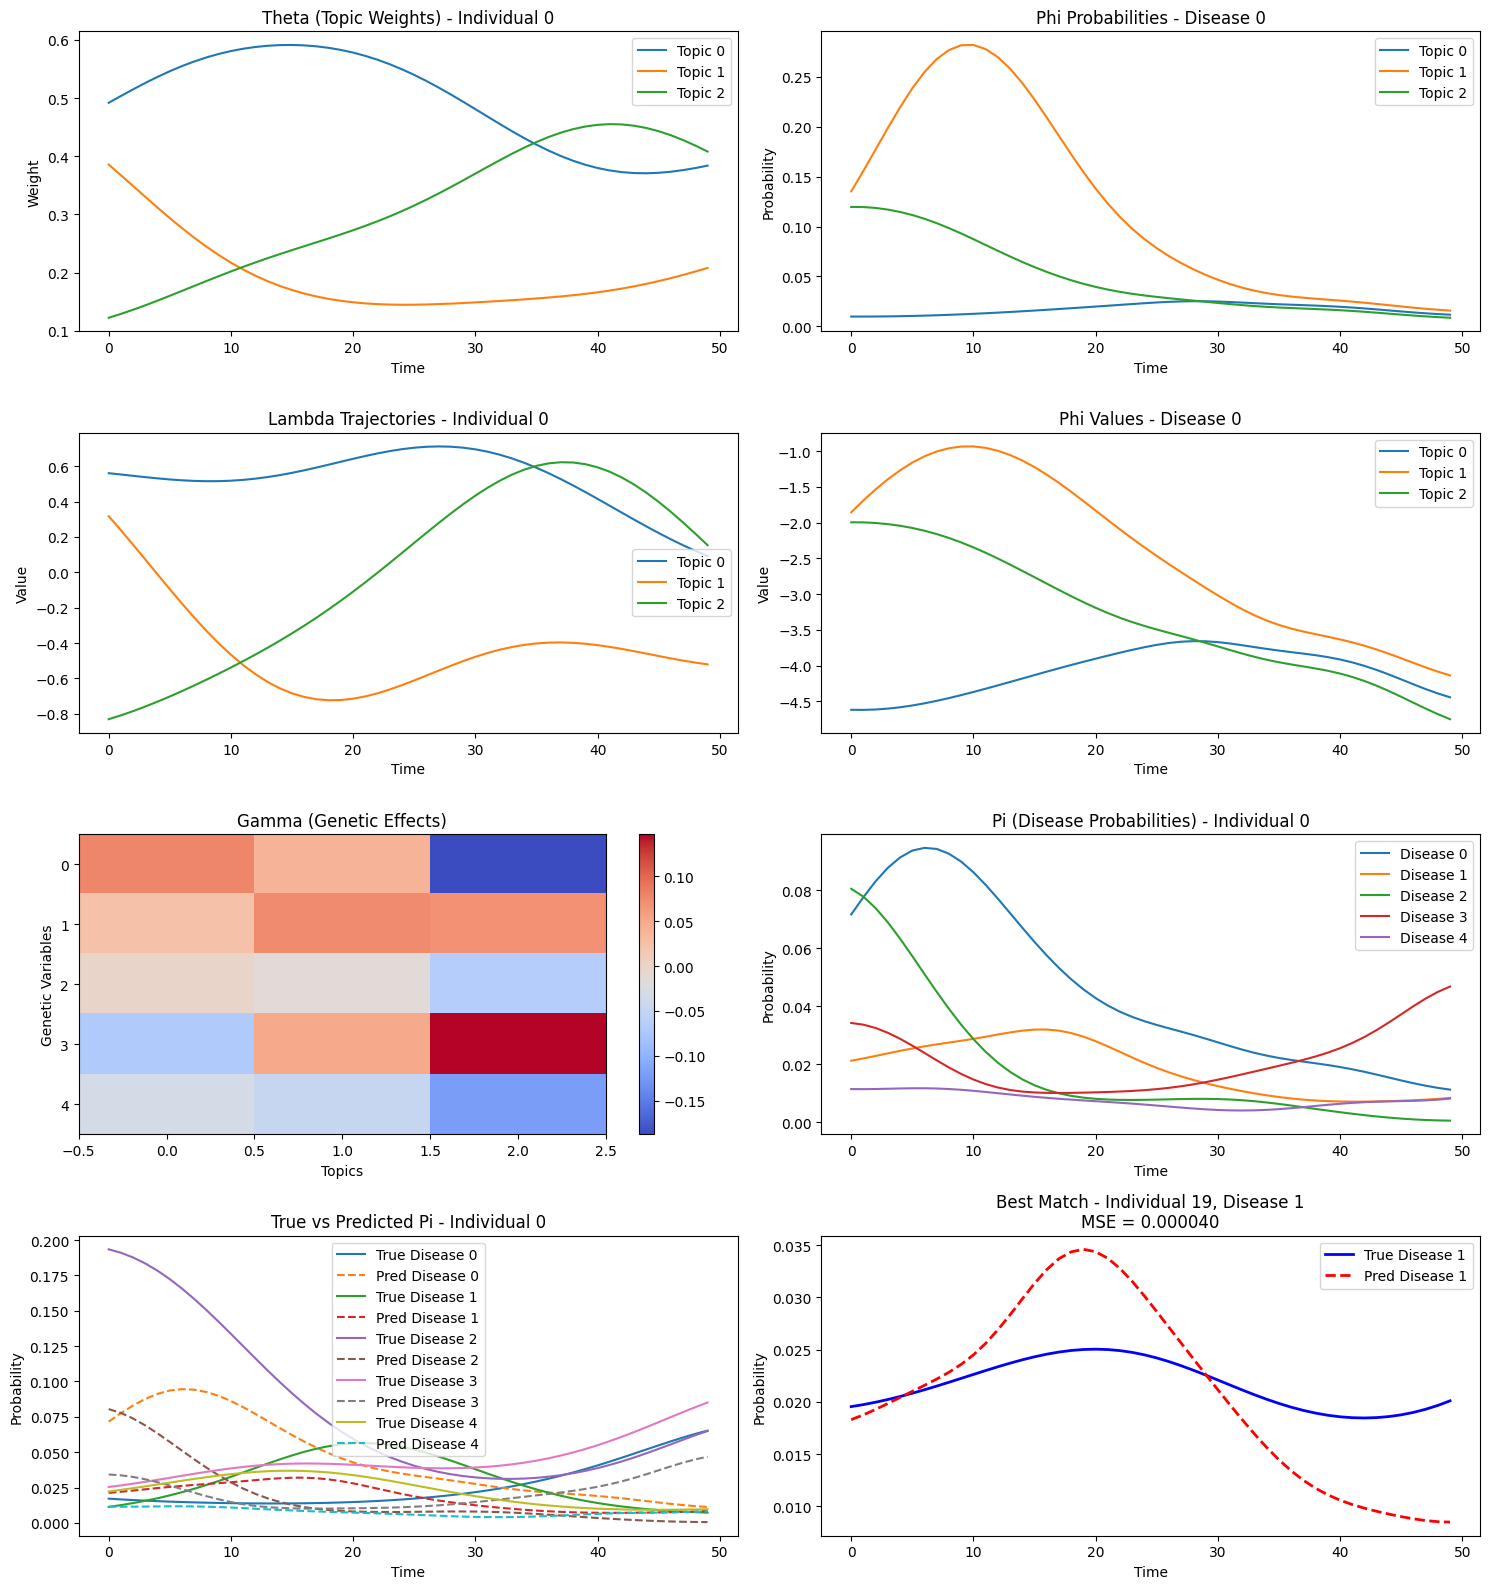

In [ ]:
pi_pred, theta, phi_prob = model.forward()

# Convert predictions to numpy
pi_pred_np = pi_pred.detach().numpy()

fig, axes = plt.subplots(4, 2, figsize=(15, 16))  # Made taller for extra row

# 1. Plot theta (topic weights) for first few individuals
theta_np = theta.detach().numpy()
for k in range(K):
    axes[0, 0].plot(theta_np[0, k, :], label=f'Topic {k}')
axes[0, 0].set_title('Theta (Topic Weights) - Individual 0')
axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('Weight')
axes[0, 0].legend()

# 2. Plot phi probabilities for first few diseases
phi_prob_np = phi_prob.detach().numpy()
for k in range(K):
    axes[0, 1].plot(phi_prob_np[k, 0, :], label=f'Topic {k}')
axes[0, 1].set_title('Phi Probabilities - Disease 0')
axes[0, 1].set_xlabel('Time')
axes[0, 1].set_ylabel('Probability')
axes[0, 1].legend()

# 3. Plot lambda trajectories
lambda_np = model.lambda_.detach().numpy()
for k in range(K):
    axes[1, 0].plot(lambda_np[0, k, :], label=f'Topic {k}')
axes[1, 0].set_title('Lambda Trajectories - Individual 0')
axes[1, 0].set_xlabel('Time')
axes[1, 0].set_ylabel('Value')
axes[1, 0].legend()

# 4. Plot raw phi values
phi_np = model.phi.detach().numpy()
for k in range(K):
    axes[1, 1].plot(phi_np[k, 0, :], label=f'Topic {k}')
axes[1, 1].set_title('Phi Values - Disease 0')
axes[1, 1].set_xlabel('Time')
axes[1, 1].set_ylabel('Value')
axes[1, 1].legend()

# 5. Plot gamma (genetic effects) as heatmap
gamma_np = model.gamma.detach().numpy()
im = axes[2, 0].imshow(gamma_np, aspect='auto', cmap='coolwarm')
axes[2, 0].set_title('Gamma (Genetic Effects)')
axes[2, 0].set_xlabel('Topics')
axes[2, 0].set_ylabel('Genetic Variables')
plt.colorbar(im, ax=axes[2, 0])

# 6. Plot final survival probabilities for first individual
pi_np = pi_pred.detach().numpy()
for d in range(D):
    axes[2, 1].plot(pi_pred_np[0, d, :], label=f'Disease {d}')
axes[2, 1].set_title('Pi (Disease Probabilities) - Individual 0')
axes[2, 1].set_xlabel('Time')
axes[2, 1].set_ylabel('Probability')
axes[2, 1].legend()

for d in range(D):
    axes[3, 0].plot(true_pi[0, d, :], '-', label=f'True Disease {d}')
    axes[3, 0].plot(pi_pred_np[0, d, :], '--', label=f'Pred Disease {d}')
axes[3, 0].set_title('True vs Predicted Pi - Individual 0')
axes[3, 0].set_xlabel('Time')
axes[3, 0].set_ylabel('Probability')
axes[3, 0].legend()

# 8. Plot true vs predicted pi for a good match
# Find a good matching individual-disease pair
mse = np.mean((true_pi - pi_pred_np)**2, axis=2)  # N×D
best_idx = np.unravel_index(np.argmin(mse), mse.shape)
i_best, d_best = best_idx

axes[3, 1].plot(true_pi[i_best, d_best, :], 'b-', 
                label=f'True Disease {d_best}', linewidth=2)
axes[3, 1].plot(pi_pred_np[i_best, d_best, :], 'r--', 
                label=f'Pred Disease {d_best}', linewidth=2)
axes[3, 1].set_title(f'Best Match - Individual {i_best}, Disease {d_best}\nMSE = {mse[i_best, d_best]:.6f}')
axes[3, 1].set_xlabel('Time')
axes[3, 1].set_ylabel('Probability')
axes[3, 1].legend()

plt.tight_layout()
plt.show()



In [ ]:
def plot_all_pi_comparison(true_pi, pred_pi):
    """
    Plot all predicted vs true pi values
    
    Parameters:
    true_pi: numpy array (N×D×T)
    pred_pi: torch tensor (N×D×T)
    """
    # Convert to numpy and flatten
    pred_pi_np = pred_pi.detach().numpy()
    true_flat = true_pi.flatten()
    pred_flat = pred_pi_np.flatten()
    
    # Create plot
    plt.figure(figsize=(10, 10))
    
    # Scatter plot
    plt.scatter(true_flat, pred_flat, alpha=0.1, color='blue')
    
    # Add diagonal line
    max_val = max(true_flat.max(), pred_flat.max())
    min_val = min(true_flat.min(), pred_flat.min())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect prediction')
    
    # Add correlation coefficient
    corr = np.corrcoef(true_flat, pred_flat)[0,1]
    mse = np.mean((true_flat - pred_flat)**2)
    
    plt.title(f'True vs Predicted π\nR: {corr:.3f}, MSE: {mse:.6f}')
    plt.xlabel('True π')
    plt.ylabel('Predicted π')
    plt.legend()
    
    # Make plot square
    plt.axis('equal')
    plt.grid(True, alpha=0.3)
    plt.show()


## simulate from a different number of topics then the fit
## matching

Epoch 0, Loss: 9539.0488
Epoch 10, Loss: 3771.4331
Epoch 20, Loss: 3021.2466
Epoch 30, Loss: 2867.4788
Epoch 40, Loss: 2747.8052
Epoch 50, Loss: 2682.4219
Epoch 60, Loss: 2644.4939
Epoch 70, Loss: 2615.5564
Epoch 80, Loss: 2590.4124
Epoch 90, Loss: 2567.5649
Epoch 100, Loss: 2546.2590
Epoch 110, Loss: 2526.2627
Epoch 120, Loss: 2507.4380
Epoch 130, Loss: 2489.6936
Epoch 140, Loss: 2472.9468
Epoch 150, Loss: 2457.1194
Epoch 160, Loss: 2442.1416
Epoch 170, Loss: 2427.9426
Epoch 180, Loss: 2414.4597
Epoch 190, Loss: 2401.6328
Epoch 200, Loss: 2389.4077
Epoch 210, Loss: 2377.7344
Epoch 220, Loss: 2366.5674
Epoch 230, Loss: 2355.8667
Epoch 240, Loss: 2345.5947
Epoch 250, Loss: 2335.7192
Epoch 260, Loss: 2326.2107
Epoch 270, Loss: 2317.0417
Epoch 280, Loss: 2308.1899
Epoch 290, Loss: 2299.6331
Epoch 300, Loss: 2291.3525
Epoch 310, Loss: 2283.3313
Epoch 320, Loss: 2275.5532
Epoch 330, Loss: 2268.0051
Epoch 340, Loss: 2260.6738
Epoch 350, Loss: 2253.5481
Epoch 360, Loss: 2246.6179
Epoch 370, L

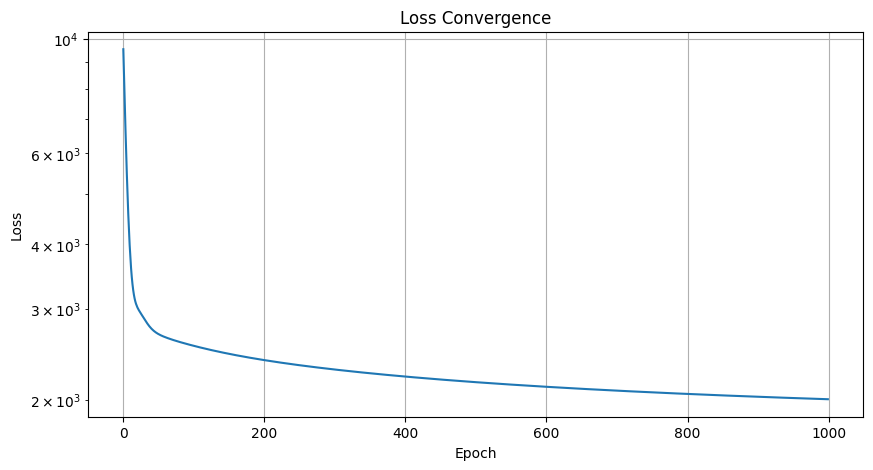

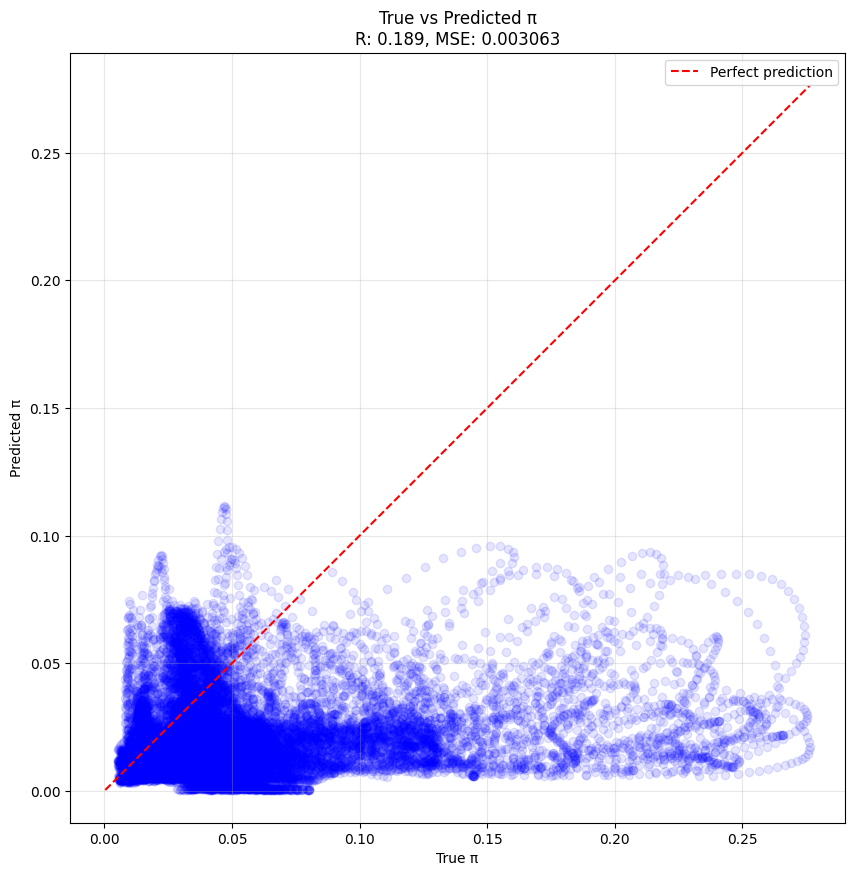

In [ ]:
# Generate synthetic data
N = 100  # Number of individuals
D = 5    # Number of diseases
T = 50   # Number of time points
K = 3    # Number of topics
P = 5    # Number of genetic covariates


true_data = generate_synthetic_data(N=N, D=D, T=T, K=K, P=P, return_true_params=True)
Y = true_data['Y']
G = true_data['G']
prevalence = prevalence_t
event_times = true_data['event_times']
true_pi = true_data['pi']
event_times=torch.tensor(event_times, dtype=torch.float32)
# 2. Initialize model
model = AladynSurvivalModel(N, D, T, K, P, G, Y, prevalence)

# 3. Fit model

# Train model with convergence-based stopping
loss_history = model.fit(
    event_times=event_times,
    learning_rate=1e-3,
    patience=10,        # Stop if no improvement for 10 epochs
    min_delta=1e-4,    # Minimum improvement threshold
    max_epochs=1000    # Maximum number of epochs as a safeguard
)
# 4. Get model predictions
pi_pred, theta_pred, phi_pred = model.forward()

plot_all_pi_comparison(true_pi, pi_pred)


In [ ]:
def plot_phi_heatmaps(phi_pred, K, D, T):
    """
    Plot heatmaps of phi values for each topic
    
    Parameters:
    phi_pred: torch tensor (K×D×T)
    K: number of topics
    D: number of diseases
    T: number of time points
    """
    phi_np = phi_pred.detach().numpy()
    
    # Create subplot grid
    fig, axes = plt.subplots(K, 1, figsize=(12, 4*K))
    if K == 1:
        axes = [axes]
    
    for k in range(K):
        # Create heatmap for topic k
        im = axes[k].imshow(phi_np[k], aspect='auto', cmap='RdBu_r')
        
        # Add colorbar
        plt.colorbar(im, ax=axes[k])
        
        # Add labels
        axes[k].set_title(f'Topic {k} Disease Patterns')
        axes[k].set_xlabel('Time')
        axes[k].set_ylabel('Disease')
        
        # Add disease numbers
        axes[k].set_yticks(range(D))
        axes[k].set_yticklabels([f'Disease {d}' for d in range(D)])
        
        # Add time ticks
        time_ticks = np.linspace(0, T-1, 5, dtype=int)
        axes[k].set_xticks(time_ticks)
        axes[k].set_xticklabels(time_ticks)
    
    plt.tight_layout()
    plt.show()

# Use after model fitting:
"""

"""

'\n\n'

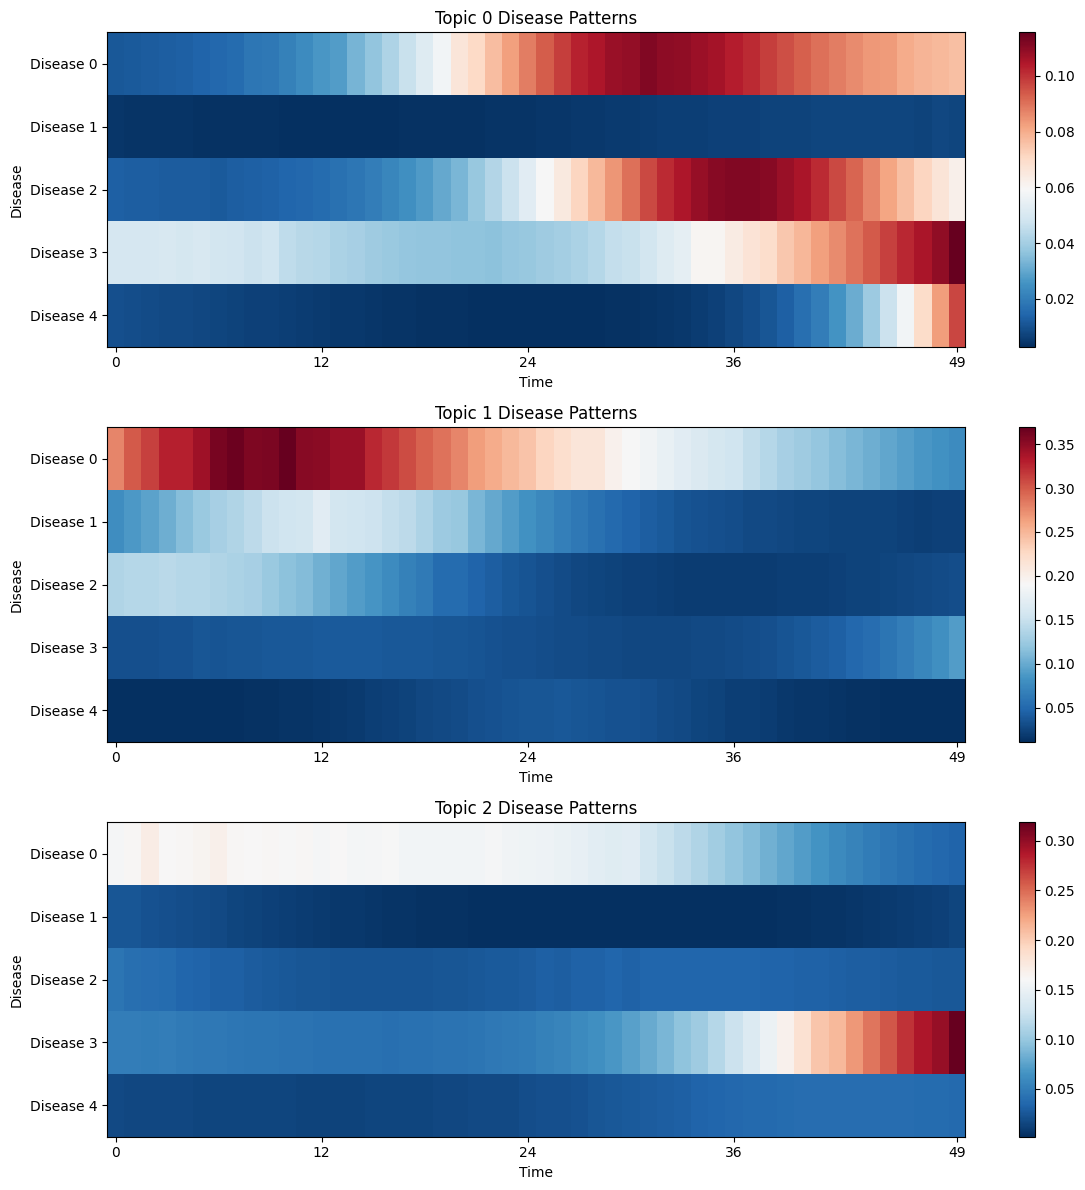

In [ ]:
pi_pred, theta_pred, phi_pred = model.forward()
plot_phi_heatmaps(phi_pred, K, D, T)

In [ ]:
def plot_theta_heatmaps(theta_pred, N, K, T, num_individuals=20):
    """
    Plot heatmaps of theta (topic weights) for a subset of individuals
    
    Parameters:
    theta_pred: torch tensor (N×K×T)
    N: number of individuals
    K: number of topics
    T: number of time points
    num_individuals: number of random individuals to plot
    """
    theta_np = theta_pred.detach().numpy()
    
    # Select random individuals if more than num_individuals
    if N > num_individuals:
        selected_idx = np.random.choice(N, num_individuals, replace=False)
        theta_subset = theta_np[selected_idx]
    else:
        selected_idx = np.arange(N)
        theta_subset = theta_np
    
    # Create subplots for each topic
    fig, axes = plt.subplots(K, 1, figsize=(15, 4*K))
    if K == 1:
        axes = [axes]
    
    for k in range(K):
        # Create heatmap for topic k
        im = axes[k].imshow(theta_subset[:, k, :], aspect='auto', cmap='viridis')
        plt.colorbar(im, ax=axes[k])
        
        # Add labels
        axes[k].set_title(f'Topic {k} Weights Across Individuals')
        axes[k].set_xlabel('Time')
        axes[k].set_ylabel('Individual')
        
        # Add individual numbers
        axes[k].set_yticks(range(len(selected_idx)))
        axes[k].set_yticklabels([f'Individual {i}' for i in selected_idx])
        
        # Add time ticks
        time_ticks = np.linspace(0, T-1, 5, dtype=int)
        axes[k].set_xticks(time_ticks)
        axes[k].set_xticklabels(time_ticks)
    
    plt.tight_layout()
    plt.show()

def plot_theta_comparison_heatmaps(true_theta, theta_pred, N, K, T, num_individuals=20):
    """
    Plot true vs predicted theta heatmaps side by side
    """
    theta_pred_np = theta_pred.detach().numpy()
    
    # Select random individuals
    if N > num_individuals:
        selected_idx = np.random.choice(N, num_individuals, replace=False)
        true_subset = true_theta[selected_idx]
        pred_subset = theta_pred_np[selected_idx]
    else:
        selected_idx = np.arange(N)
        true_subset = true_theta
        pred_subset = theta_pred_np
    
    fig, axes = plt.subplots(K, 2, figsize=(20, 4*K))
    
    for k in range(K):
        # True theta
        im1 = axes[k,0].imshow(true_subset[:, k, :], aspect='auto', cmap='viridis')
        plt.colorbar(im1, ax=axes[k,0])
        axes[k,0].set_title(f'True Topic {k} Weights')
        axes[k,0].set_xlabel('Time')
        axes[k,0].set_ylabel('Individual')
        
        # Predicted theta
        im2 = axes[k,1].imshow(pred_subset[:, k, :], aspect='auto', cmap='viridis')
        plt.colorbar(im2, ax=axes[k,1])
        axes[k,1].set_title(f'Predicted Topic {k} Weights')
        axes[k,1].set_xlabel('Time')
        axes[k,1].set_ylabel('Individual')
        
        # Add labels
        for ax in [axes[k,0], axes[k,1]]:
            ax.set_yticks(range(len(selected_idx)))
            ax.set_yticklabels([f'Individual {i}' for i in selected_idx])
            time_ticks = np.linspace(0, T-1, 5, dtype=int)
            ax.set_xticks(time_ticks)
            ax.set_xticklabels(time_ticks)
    
    plt.tight_layout()
    plt.show()



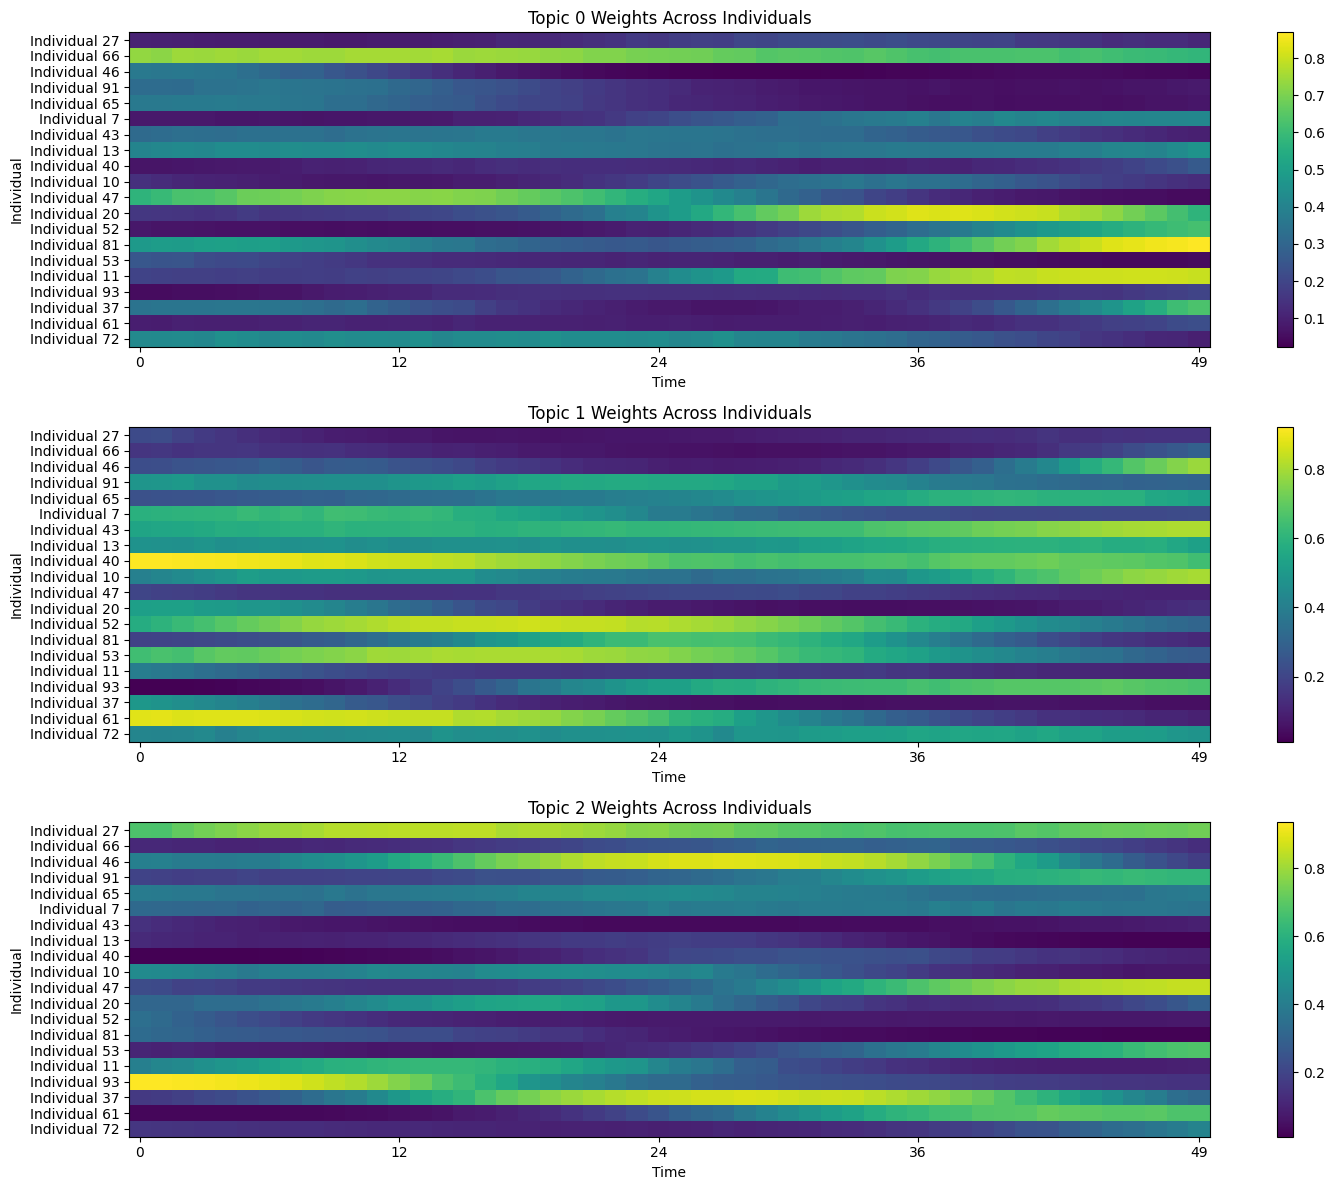

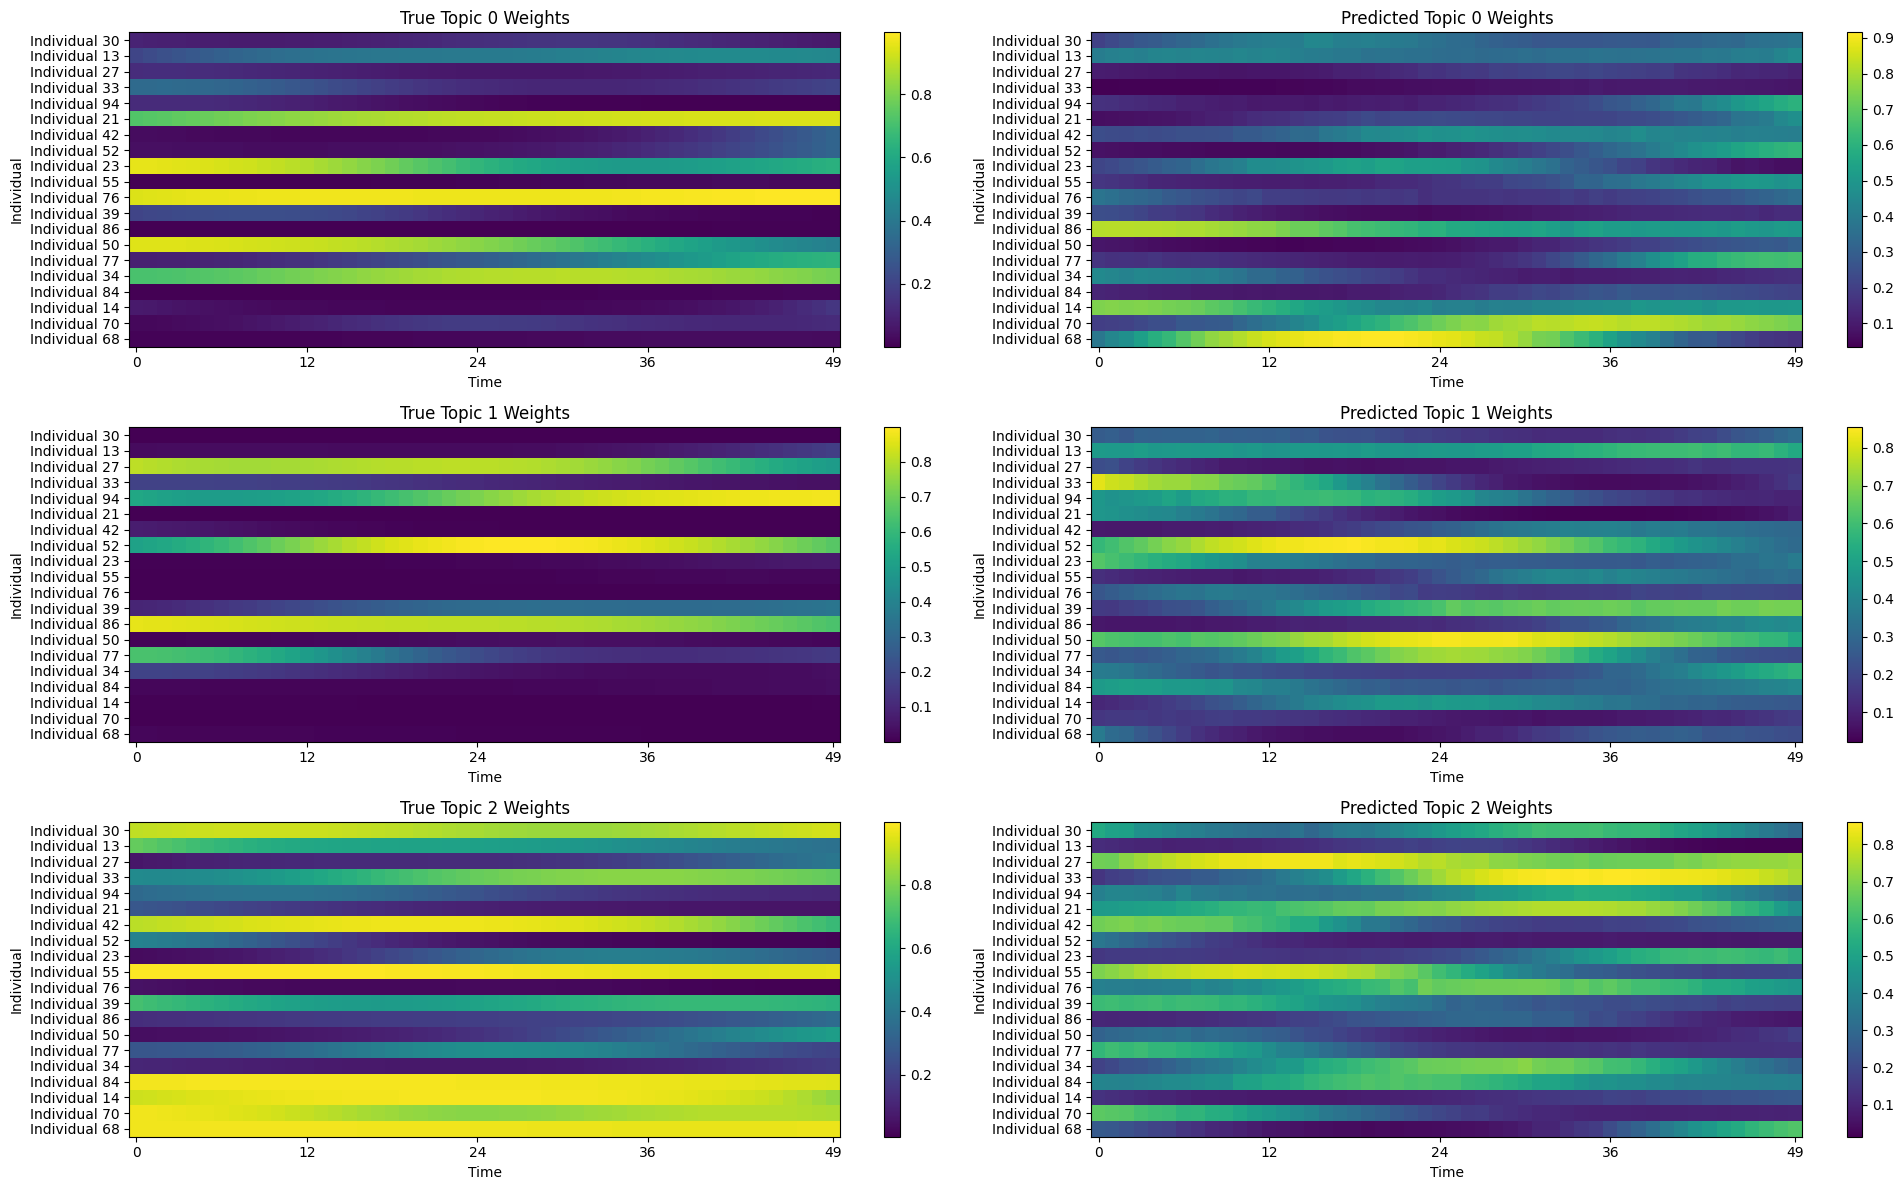

In [ ]:

true_theta = true_data['theta']
pi_pred, theta_pred, phi_pred = model.forward()

# Plot predicted theta only
plot_theta_heatmaps(theta_pred, N, K, T, num_individuals=20)

# Plot true vs predicted comparison
plot_theta_comparison_heatmaps(true_theta, theta_pred, N, K, T, num_individuals=20)


In [ ]:
true_pi[:,:,49]

array([[0.06523936, 0.00724   , 0.06495312, 0.08511014, 0.00965726],
       [0.03957404, 0.02125382, 0.08032053, 0.00904987, 0.00926897],
       [0.21562957, 0.027126  , 0.03261847, 0.03692581, 0.07585795],
       [0.22742227, 0.02819375, 0.02980483, 0.03552769, 0.08074092],
       [0.06257828, 0.00845003, 0.06640899, 0.07840033, 0.00946473],
       [0.0496121 , 0.01875432, 0.07599707, 0.02436237, 0.01128935],
       [0.04059951, 0.02127321, 0.0800343 , 0.00928401, 0.00964754],
       [0.07258771, 0.01070477, 0.06478379, 0.0706847 , 0.0144544 ],
       [0.17260396, 0.02357337, 0.0430781 , 0.04036599, 0.05825742],
       [0.23289335, 0.02889642, 0.02861678, 0.03387531, 0.08313624],
       [0.18428566, 0.02273711, 0.03921934, 0.04815113, 0.06190748],
       [0.23253242, 0.02892081, 0.02873518, 0.03364177, 0.08302256],
       [0.192263  , 0.02595597, 0.03872858, 0.03511752, 0.06677525],
       [0.07773839, 0.01676013, 0.06671716, 0.04301337, 0.02008978],
       [0.05406396, 0.00838158, 0.

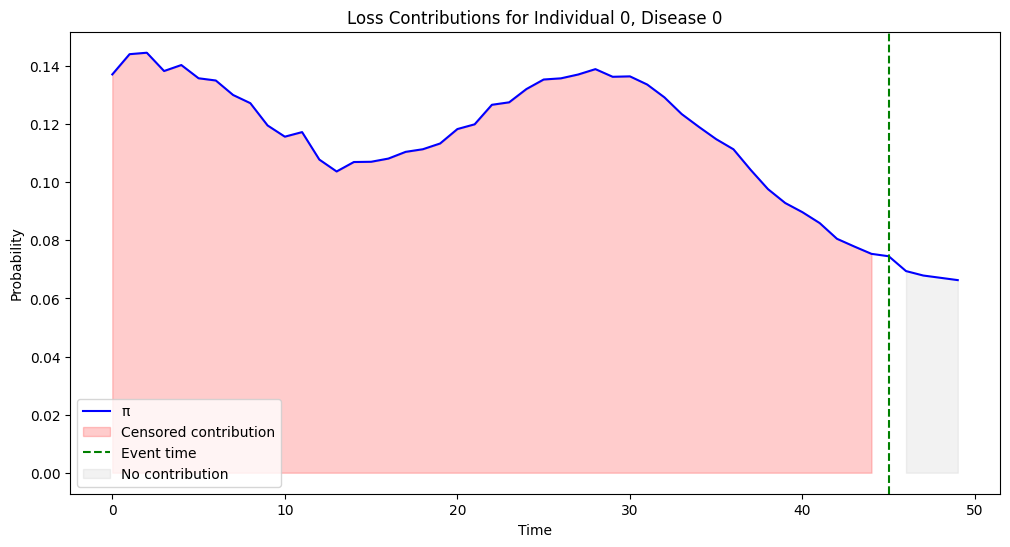

In [ ]:
def plot_event_contribution(pi, event_time, Y, disease_idx=0, individual_idx=0):
    """Visualize how an event contributes to the loss"""
    T = pi.shape[-1]
    time_grid = np.arange(T)
    
    plt.figure(figsize=(12, 6))
    
    # Plot pi
    plt.plot(time_grid, pi[individual_idx, disease_idx, :].detach().numpy(), 
             label='π', color='blue')
    
    # Shade regions
    if Y[individual_idx, disease_idx, event_time] == 1:
        # Before event (censored)
        plt.fill_between(time_grid[:event_time], 0, 
                        pi[individual_idx, disease_idx, :event_time].detach().numpy(),
                        alpha=0.2, color='red', label='Censored contribution')
        
        # At event
        plt.axvline(x=event_time, color='green', linestyle='--', 
                   label='Event time')
        
        # After event (no contribution)
        plt.fill_between(time_grid[event_time+1:], 0, 
                        pi[individual_idx, disease_idx, event_time+1:].detach().numpy(),
                        alpha=0.1, color='gray', label='No contribution')
    
    plt.title(f'Loss Contributions for Individual {individual_idx}, Disease {disease_idx}')
    plt.xlabel('Time')
    plt.ylabel('Probability')
    plt.legend()
    plt.show()

# Usage:

pi_pred, _, _ = model.forward()
plot_event_contribution(pi_pred, event_times[0,0], Y)


In [ ]:
def analyze_genetic_effects(model, G):
    """
    Analyze and visualize genetic contributions
    
    Parameters:
    model: trained AladynSurvivalModel
    G: genetic covariates (N×P)
    """
    gamma_np = model.gamma.detach().numpy()  # P×K
    G_np = G.numpy() if isinstance(G, torch.Tensor) else G
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. Heatmap of gamma (genetic effects per topic)
    im1 = axes[0,0].imshow(gamma_np, aspect='auto', cmap='RdBu_r')
    axes[0,0].set_title('Gamma (Genetic Effects per Topic)')
    axes[0,0].set_xlabel('Topics')
    axes[0,0].set_ylabel('Genetic Variables')
    plt.colorbar(im1, ax=axes[0,0])
    
    # 2. Distribution of genetic effects
    genetic_contribution = G_np @ gamma_np  # N×K
    for k in range(model.K):
        axes[0,1].hist(genetic_contribution[:,k], 
                      alpha=0.5, label=f'Topic {k}')
    axes[0,1].set_title('Distribution of Genetic Effects')
    axes[0,1].set_xlabel('Effect Size')
    axes[0,1].set_ylabel('Count')
    axes[0,1].legend()
    
    # 3. Genetic effect vs Topic weights
    pi_pred, theta_pred, _ = model.forward()
    theta_np = theta_pred.detach().numpy()
    
    for k in range(model.K):
        axes[1,0].scatter(genetic_contribution[:,k], 
                         theta_np[:,k,:].mean(axis=1),
                         alpha=0.5, label=f'Topic {k}')
    axes[1,0].set_title('Genetic Effect vs Average Topic Weight')
    axes[1,0].set_xlabel('Genetic Effect')
    axes[1,0].set_ylabel('Average Topic Weight')
    axes[1,0].legend()
    
    # 4. Top genetic predictors per topic
    top_n = 3
    positions = []
    labels = []
    effects_list = []
    colors = plt.cm.Set3(np.linspace(0, 1, model.K))
    
    for k in range(model.K):
        top_idx = np.argsort(np.abs(gamma_np[:,k]))[-top_n:]
        effects = gamma_np[top_idx,k]
        
        # Calculate positions for this topic
        pos = np.arange(top_n) + k*(top_n + 1)  # Add gap between topics
        positions.extend(pos)
        effects_list.extend(effects)
        labels.extend([f'Gene {i}\n(Topic {k})' for i in top_idx])
        
        # Plot bars for this topic
        axes[1,1].barh(pos, effects, color=colors[k], 
                      label=f'Topic {k}')
    
    axes[1,1].set_yticks(positions)
    axes[1,1].set_yticklabels(labels)
    axes[1,1].set_title('Top Genetic Predictors per Topic')
    axes[1,1].set_xlabel('Effect Size')
    axes[1,1].legend()
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\nGenetic Effect Summary:")
    for k in range(model.K):
        print(f"\nTopic {k}:")
        print("Top positive genetic effects:")
        top_pos = np.argsort(gamma_np[:,k])[-3:]
        for idx in top_pos:
            print(f"  Gene {idx}: {gamma_np[idx,k]:.3f}")
        print("Top negative genetic effects:")
        top_neg = np.argsort(gamma_np[:,k])[:3]
        for idx in top_neg:
            print(f"  Gene {idx}: {gamma_np[idx,k]:.3f}")

# Usage:
"""
analyze_genetic_effects(model, G)
"""

'\nanalyze_genetic_effects(model, G)\n'

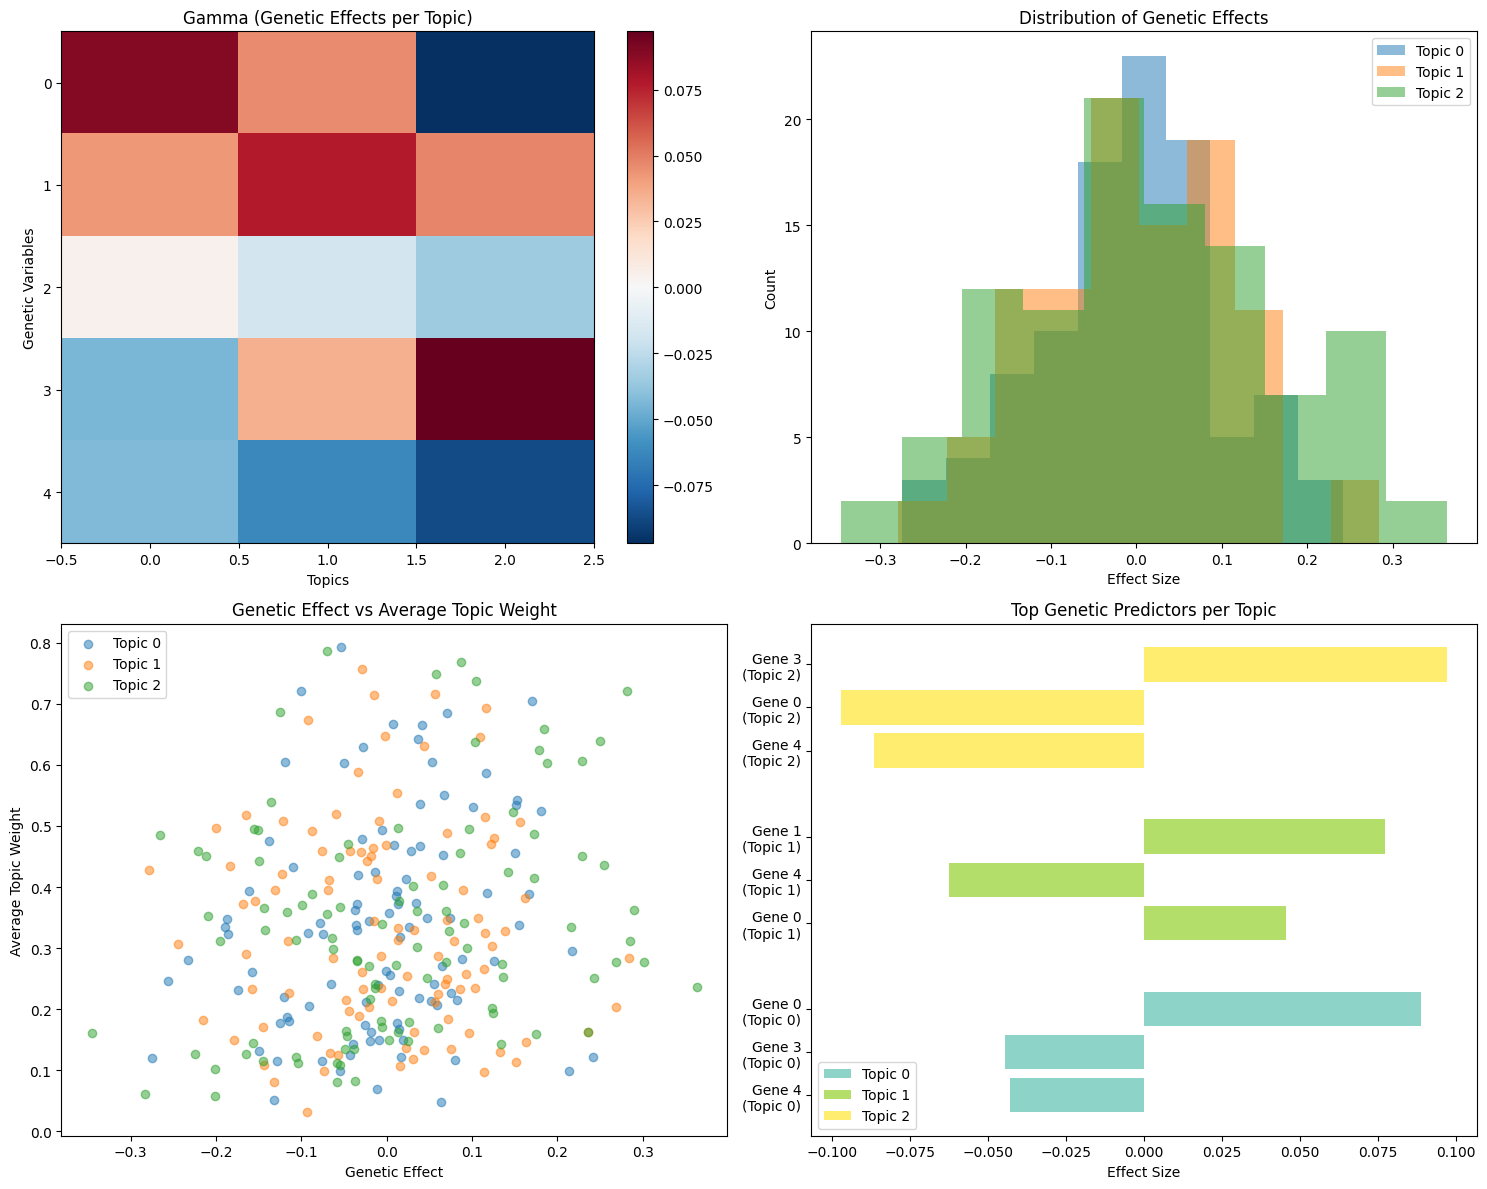


Genetic Effect Summary:

Topic 0:
Top positive genetic effects:
  Gene 2: 0.004
  Gene 1: 0.042
  Gene 0: 0.089
Top negative genetic effects:
  Gene 3: -0.045
  Gene 4: -0.043
  Gene 2: 0.004

Topic 1:
Top positive genetic effects:
  Gene 3: 0.035
  Gene 0: 0.046
  Gene 1: 0.077
Top negative genetic effects:
  Gene 4: -0.063
  Gene 2: -0.018
  Gene 3: 0.035

Topic 2:
Top positive genetic effects:
  Gene 2: -0.035
  Gene 1: 0.048
  Gene 3: 0.097
Top negative genetic effects:
  Gene 0: -0.097
  Gene 4: -0.086
  Gene 2: -0.035


In [ ]:

analyze_genetic_effects(model, G)



In [ ]:
import rpy2.robjects as robjects
import numpy as np
import os as os
from rpy2.robjects import numpy2ri
# Specify the path to your data files
data_path = "/Users/sarahurbut/tensornoulli_ehr/data"

# Activate automatic conversion between R and NumPy arrays
numpy2ri.activate()

# Load data saved as .rds files
Y = np.array(robjects.r['readRDS'](os.path.join(data_path, 'Y.rds')))
E = np.array(robjects.r['readRDS'](os.path.join(data_path, 'event_for_aladynoulli.rds')))
G = np.array(robjects.r['readRDS'](os.path.join(data_path, 'prs.rds')))
# Print shapes to verify
print("Y shape:", Y.shape)
print("E shape:", E.shape)
print("G shape:", G.shape)

Y shape: (9661, 348, 51)
E shape: (9661, 348)
G shape: (36, 9661)


In [ ]:
# E should be int64
E = E.astype(int)

# G should be float64
G = G.astype(float)

G.shape
G = G.T
print("G shape after transposition:", G.shape)

# Print the first few elements of the first row to verify
print("G first elements of first individual after transposition:", G[0, :5])

G shape after transposition: (9661, 36)
G first elements of first individual after transposition: [-0.09865071 -0.61293518 -0.71439616 -0.49112834  0.4647725 ]


In [ ]:
# Convert to PyTorch tensors
Y_tensor = torch.FloatTensor(Y)
E_tensor = torch.FloatTensor(E)
G_tensor = torch.FloatTensor(G)


In [ ]:
# Get dimensions
N, D, T = Y_tensor.shape
P = G_tensor.shape[1]
T = int(E_tensor.max() + 1)  # 0-indexed time
K = 10  # number of topics

# Print shapes to verify
print("Tensor shapes:")
print(f"Y: {Y_tensor.shape}")  # [N, D]
print(f"E: {E_tensor.shape}")  # [N, D]
print(f"G: {G_tensor.shape}")  # [N, P]
print(f"Time range: 0 to {T-1}")
print(T)


Tensor shapes:
Y: torch.Size([9661, 348, 51])
E: torch.Size([9661, 348])
G: torch.Size([9661, 36])
Time range: 0 to 50
51


In [ ]:
import torch
import numpy as np

# Check event times
print(f"Max event time in E: {E_tensor.max()}")
print(f"Min event time in E: {E_tensor.min()}")


Max event time in E: 50.0
Min event time in E: 0.0


In [ ]:
# Verify 0-based indexing
print("\nUnique event times:")
print(np.sort(np.unique(E)))

# Check for any values that might be T+1
print("\nNumber of events at each time:")
unique, counts = np.unique(E, return_counts=True)
for time, count in zip(unique, counts):
    print(f"Time {time}: {count} events")


Unique event times:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50]

Number of events at each time:
Time 0: 26 events
Time 1: 39 events
Time 2: 66 events
Time 3: 91 events
Time 4: 115 events
Time 5: 95 events
Time 6: 190 events
Time 7: 191 events
Time 8: 276 events
Time 9: 257 events
Time 10: 368 events
Time 11: 373 events
Time 12: 483 events
Time 13: 410 events
Time 14: 714 events
Time 15: 607 events
Time 16: 853 events
Time 17: 869 events
Time 18: 1200 events
Time 19: 1024 events
Time 20: 1456 events
Time 21: 1292 events
Time 22: 2070 events
Time 23: 1898 events
Time 24: 2311 events
Time 25: 2324 events
Time 26: 2712 events
Time 27: 2407 events
Time 28: 3047 events
Time 29: 2617 events
Time 30: 3483 events
Time 31: 2877 events
Time 32: 3781 events
Time 33: 3216 events
Time 34: 4151 events
Time 35: 3503 events
Time 36: 4670 events
Time 37: 3625 events
Time 38: 4626 events
Time

In [ ]:

# Compute average prevalence over time for each disease
prevalence = Y_tensor.mean(dim=0).mean(dim=1)  # [D]
print(f"Prevalence shape: {prevalence.shape}")  #


Prevalence shape: torch.Size([348])


In [ ]:
# Initialize model
model = AladynSurvivalModel(
    N=N, 
    D=D, 
    T=T, 
    K=K, 
    P=P,
    G=G_tensor,
    Y=Y_tensor,
    prevalence=prevalence
)

# Fit model
losses = model.fit(
    event_times=E_tensor,
    num_epochs=1000,
    learning_rate=5e-4
)

/Users/sarahurbut/aladynoulli/pyScripts/gp_softmax_torch_works_play.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.G = torch.tensor(G, dtype=torch.float32)            # Genetic covariates (N x P)
/Users/sarahurbut/aladynoulli/pyScripts/gp_softmax_torch_works_play.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.Y = torch.tensor(Y, dtype=torch.float32)            # Disease occurrences (N x D x T)
/Users/sarahurbut/aladynoulli/pyScripts/gp_softmax_torch_works_play.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self

Shape checks:
lambda_: torch.Size([9661, 10, 51])
phi: torch.Size([10, 348, 51])
K_lambda[0]: torch.Size([51, 51])
K_phi[0]: torch.Size([51, 51])
G: torch.Size([9661, 36])
gamma: torch.Size([36, 10])
logit_prev: torch.Size([348])

Epoch 0
Loss: 3402220.5000
Length scales: [16.9995 16.9995 16.9995 16.9995 16.9995 16.9995 16.9995 16.9995 16.9995
 16.9995]
Amplitudes: [1.0005001 1.0005001 1.0005001 1.0005001 1.0005001 1.0005001 1.0005001
 1.0005001 1.0005001 1.0005001]
Max gradients - λ: 64.6976, φ: 141.7501, γ: 466.5054
Mean condition number: 5022.34
Shape checks:
lambda_: torch.Size([9661, 10, 51])
phi: torch.Size([10, 348, 51])
K_lambda[0]: torch.Size([51, 51])
K_phi[0]: torch.Size([51, 51])
G: torch.Size([9661, 36])
gamma: torch.Size([36, 10])
logit_prev: torch.Size([348])
Shape checks:
lambda_: torch.Size([9661, 10, 51])
phi: torch.Size([10, 348, 51])
K_lambda[0]: torch.Size([51, 51])
K_phi[0]: torch.Size([51, 51])
G: torch.Size([9661, 36])
gamma: torch.Size([36, 10])
logit_prev: tor

In [ ]:
import torch
import os
from datetime import datetime

# Create a timestamp for unique filename
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
save_dir = "/Users/sarahurbut/aladynoulli/saved_models"
os.makedirs(save_dir, exist_ok=True)

# Get current predictions
pi_pred, theta_pred, phi_pred = model.forward()

# Save everything in one file
model_path = os.path.join(save_dir, f"aladyn_model_full_{timestamp}.pt")
torch.save({
    # Model state
    'model_state_dict': model.state_dict(),
    'losses': losses,
    
    # Model parameters
    'lambda': model.lambda_.detach(),
    'phi': model.phi.detach(),
    'gamma': model.gamma.detach(),
    'length_scales': model.length_scales.detach(),
    'log_amplitudes': model.log_amplitudes.detach(),
    
    # Predictions
    'pi_pred': pi_pred.detach(),
    'theta_pred': theta_pred.detach(),
    'phi_pred': phi_pred.detach(),
    
    # Input data
    'Y': Y_tensor,
    'G': G_tensor,
    'E': E_tensor,
    'prevalence': prevalence,
    
    # Hyperparameters
    'hyperparameters': {
        'N': N,
        'D': D,
        'T': T,
        'K': K,
        'P': P,
    }
}, model_path)

print(f"Model saved to: {model_path}")

Model saved to: /Users/sarahurbut/aladynoulli/saved_models/aladyn_model_full_20241101_061309.pt


In [ ]:
import torch
import os
from datetime import datetime

# Create a timestamp for unique filename
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
save_dir = "/Users/sarahurbut/aladynoulli/saved_models"
os.makedirs(save_dir, exist_ok=True)

# Get current predictions
pi_pred, theta_pred, phi_pred = model.forward()

# Save everything in one file
model_path = os.path.join(save_dir, f"aladyn_model_full_{timestamp}.pt")
torch.save({
    # Model state
    'model_state_dict': model.state_dict(),
    'losses': losses,
    
    # Model parameters
    'lambda': model.lambda_.detach(),
    'phi': model.phi.detach(),
    'gamma': model.gamma.detach(),
    'length_scales': model.length_scales.detach(),
    'log_amplitudes': model.log_amplitudes.detach(),
    
    # Predictions
    'pi_pred': pi_pred.detach(),
    'theta_pred': theta_pred.detach(),
    'phi_pred': phi_pred.detach(),
    
    # Input data
    'Y': Y_tensor,
    'G': G_tensor,
    'E': E_tensor,
    'prevalence': prevalence,
    
    # Hyperparameters
    'hyperparameters': {
        'N': N,
        'D': D,
        'T': T,
        'K': K,
        'P': P,
    }
}, model_path)

print(f"Model saved to: {model_path}")

Model saved to: /Users/sarahurbut/aladynoulli/saved_models/aladyn_model_full_20241101_061309.pt


In [ ]:
# Real data dimensions are:
print("Real data dimensions:")
print(f"N (individuals): {N}")  # From Y shape
print(f"D (diseases): {D}")     # From Y shape
print(f"T (timepoints): {T}")   # From max event time + 1
print(f"P (genetic): {P}")      # From G shape
print(f"K (topics): {K}")       # Set to 10


Real data dimensions:
N (individuals): 9661
D (diseases): 348
T (timepoints): 51
P (genetic): 36
K (topics): 10


In [ ]:
pi_pred, theta_pred, phi_pred = model.forward()

# Plot predicted theta only
pi_pred, theta, phi_prob = model.forward()

# Convert predictions to numpy
pi_pred_np = pi_pred.detach().numpy()

fig, axes = plt.subplots(3, 2, figsize=(15, 16))  # Made taller for extra row

# 1. Plot theta (topic weights) for first few individuals
theta_np = theta.detach().numpy()
for k in range(K):
    axes[0, 0].plot(theta_np[0, k, :], label=f'Topic {k}')
axes[0, 0].set_title('Theta (Topic Weights) - Individual 0')
axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('Weight')
axes[0, 0].legend()

# 2. Plot phi probabilities for first few diseases
phi_prob_np = phi_prob.detach().numpy()
for k in range(K):
    axes[0, 1].plot(phi_prob_np[k, 0, :], label=f'Topic {k}')
axes[0, 1].set_title('Phi Probabilities - Disease 0')
axes[0, 1].set_xlabel('Time')
axes[0, 1].set_ylabel('Probability')
axes[0, 1].legend()

# 3. Plot lambda trajectories
lambda_np = model.lambda_.detach().numpy()
for k in range(K):
    axes[1, 0].plot(lambda_np[0, k, :], label=f'Topic {k}')
axes[1, 0].set_title('Lambda Trajectories - Individual 0')
axes[1, 0].set_xlabel('Time')
axes[1, 0].set_ylabel('Value')
axes[1, 0].legend()

# 4. Plot raw phi values
phi_np = model.phi.detach().numpy()
for k in range(K):
    axes[1, 1].plot(phi_np[k, 0, :], label=f'Topic {k}')
axes[1, 1].set_title('Phi Values - Disease 0')
axes[1, 1].set_xlabel('Time')
axes[1, 1].set_ylabel('Value')
axes[1, 1].legend()

# 5. Plot gamma (genetic effects) as heatmap
gamma_np = model.gamma.detach().numpy()
im = axes[2, 0].imshow(gamma_np, aspect='auto', cmap='coolwarm')
axes[2, 0].set_title('Gamma (Genetic Effects)')
axes[2, 0].set_xlabel('Topics')
axes[2, 0].set_ylabel('Genetic Variables')
plt.colorbar(im, ax=axes[2, 0])

# 6. Plot final survival probabilities for first individual
pi_np = pi_pred.detach().numpy()
for d in range(D):
    axes[2, 1].plot(pi_pred_np[0, d, :], label=f'Disease {d}')
axes[2, 1].set_title('Pi (Disease Probabilities) - Individual 0')
axes[2, 1].set_xlabel('Time')
axes[2, 1].set_ylabel('Probability')
axes[2, 1].legend()



plt.tight_layout()
plt.show()




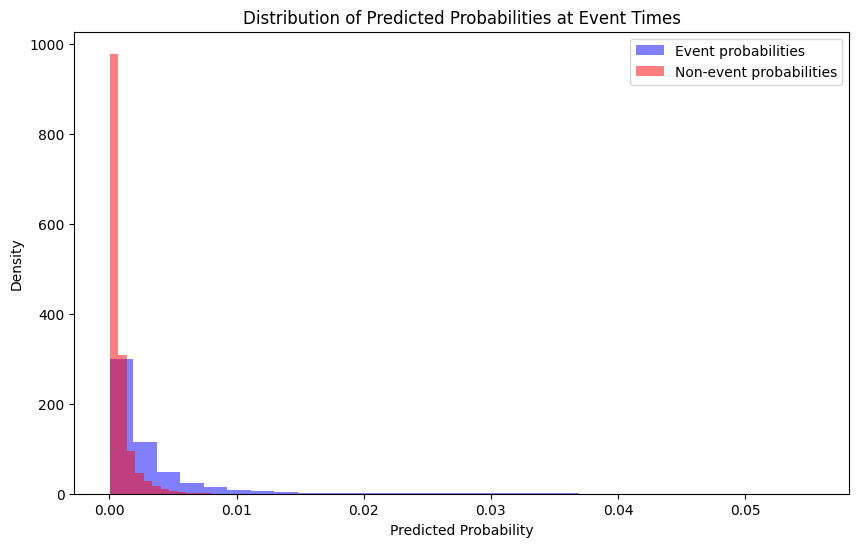

Mean probability at events: 0.003
Number of events: 105035
Mean probability at non-events: 0.001
Number of non-events: 3256993


In [ ]:
def evaluate_event_prediction(model, Y, E):
    """
    Evaluate how well the model predicts events
    """
    # Get predictions and convert everything to numpy
    pi_pred, _, _ = model.forward()
    pi_np = pi_pred.detach().numpy()
    Y_np = Y.detach().numpy()
    E_np = E.detach().numpy().astype(int)  # Convert to integer indices
    
    # Get probabilities at event times
    event_probs = []
    non_event_probs = []
    
    N, D, _ = Y_np.shape
    
    for i in range(N):
        for d in range(D):
            event_time = int(E_np[i,d])  # Ensure integer index
            try:
                if Y_np[i,d,event_time] == 1:  # If there's an event
                    event_probs.append(pi_np[i,d,event_time])
                else:
                    non_event_probs.append(pi_np[i,d,event_time])
            except IndexError:
                print(f"Warning: Index error at i={i}, d={d}, t={event_time}")
                continue
    
    # Plot distributions
    plt.figure(figsize=(10, 6))
    if event_probs:  # Only plot if we have events
        plt.hist(event_probs, alpha=0.5, label='Event probabilities', 
                density=True, bins=30, color='blue')
    if non_event_probs:  # Only plot if we have non-events
        plt.hist(non_event_probs, alpha=0.5, label='Non-event probabilities', 
                density=True, bins=30, color='red')
    
    plt.title('Distribution of Predicted Probabilities at Event Times')
    plt.xlabel('Predicted Probability')
    plt.ylabel('Density')
    plt.legend()
    plt.show()
    
    # Print summary statistics
    if event_probs:
        print(f"Mean probability at events: {np.mean(event_probs):.3f}")
        print(f"Number of events: {len(event_probs)}")
    if non_event_probs:
        print(f"Mean probability at non-events: {np.mean(non_event_probs):.3f}")
        print(f"Number of non-events: {len(non_event_probs)}")

# Use the function
evaluate_event_prediction(model, Y_tensor, E_tensor)

In [ ]:
from gp_softmax_torch_works_play_matrprev import *
prevalence_t = compute_smoothed_prevalence(Y, window_size=5)
model = AladynSurvivalModel(N, D, T, K, P, G, Y, prevalence_t)

In [ ]:
losses = model.fit(
    event_times=E_tensor,
    num_epochs=1000,
    learning_rate=5e-4
)

/Users/sarahurbut/aladynoulli/pyScripts/gp_softmax_torch_works_play_matrprev.py:140: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  event_times_tensor = torch.tensor(event_times, dtype=torch.long)



Epoch 0
Loss: 3354242.7500
Length scales: [16.9995 16.9995 16.9995 16.9995 16.9995 16.9995 16.9995 16.9995 16.9995
 16.9995]
Amplitudes: [1.0005001 1.0005001 1.0005001 1.0005001 1.0005001 1.0005001 1.0005001
 1.0005001 1.0005001 1.0005001]
Max gradients - λ: 64.5097, φ: 90.4745, γ: 419.2520
Mean condition number: 5022.34

Epoch 10
Loss: 3121162.5000
Length scales: [16.994503 16.994503 16.994503 16.994503 16.994503 16.994503 16.994503
 16.994503 16.994503 16.994503]
Amplitudes: [1.0055153 1.0055153 1.0055153 1.0055153 1.0055153 1.0055153 1.0055153
 1.0055153 1.0055153 1.0055153]
Max gradients - λ: 63.6837, φ: 90.0109, γ: 303.0616
Mean condition number: 5071.90

Epoch 20
Loss: 2908104.5000
Length scales: [16.989513 16.989513 16.989513 16.989513 16.989513 16.989513 16.989515
 16.989513 16.989513 16.989513]
Amplitudes: [1.0105565 1.0105565 1.0105567 1.0105566 1.0105566 1.0105565 1.0105561
 1.0105565 1.0105566 1.0105565]
Max gradients - λ: 62.8395, φ: 89.5468, γ: 201.2383
Mean condition nu

880578.2500

In [ ]:
import torch
import os
from datetime import datetime

# Create a timestamp for unique filename
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
save_dir = "/Users/sarahurbut/Dropbox (Personal)/saved_models"
#os.makedirs(save_dir, exist_ok=True)

# Get current predictions
pi_pred, theta_pred, phi_pred = model.forward()

# Save everything in one file
model_path = os.path.join(save_dir, f"aladyn_model_full_{timestamp}.pt")
torch.save({
    # Model state
    'model_state_dict': model.state_dict(),
    'losses': losses,
    
    # Model parameters
    'lambda': model.lambda_.detach(),
    'phi': model.phi.detach(),
    'gamma': model.gamma.detach(),
    'length_scales': model.length_scales.detach(),
    'log_amplitudes': model.log_amplitudes.detach(),
    
    # Predictions
    'pi_pred': pi_pred.detach(),
    'theta_pred': theta_pred.detach(),
    'phi_pred': phi_pred.detach(),
    
    # Input data
    'Y': Y_tensor,
    'G': G_tensor,
    'E': E_tensor,
    'prevalence': prevalence,
    
    # Hyperparameters
    'hyperparameters': {
        'N': N,
        'D': D,
        'T': T,
        'K': K,
        'P': P,
    }
}, model_path)

print(f"Model saved to: {model_path}")

Model saved to: /Users/sarahurbut/Dropbox (Personal)/saved_models/aladyn_model_full_20241101_220458.pt


/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_78159/255977654.py:66: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


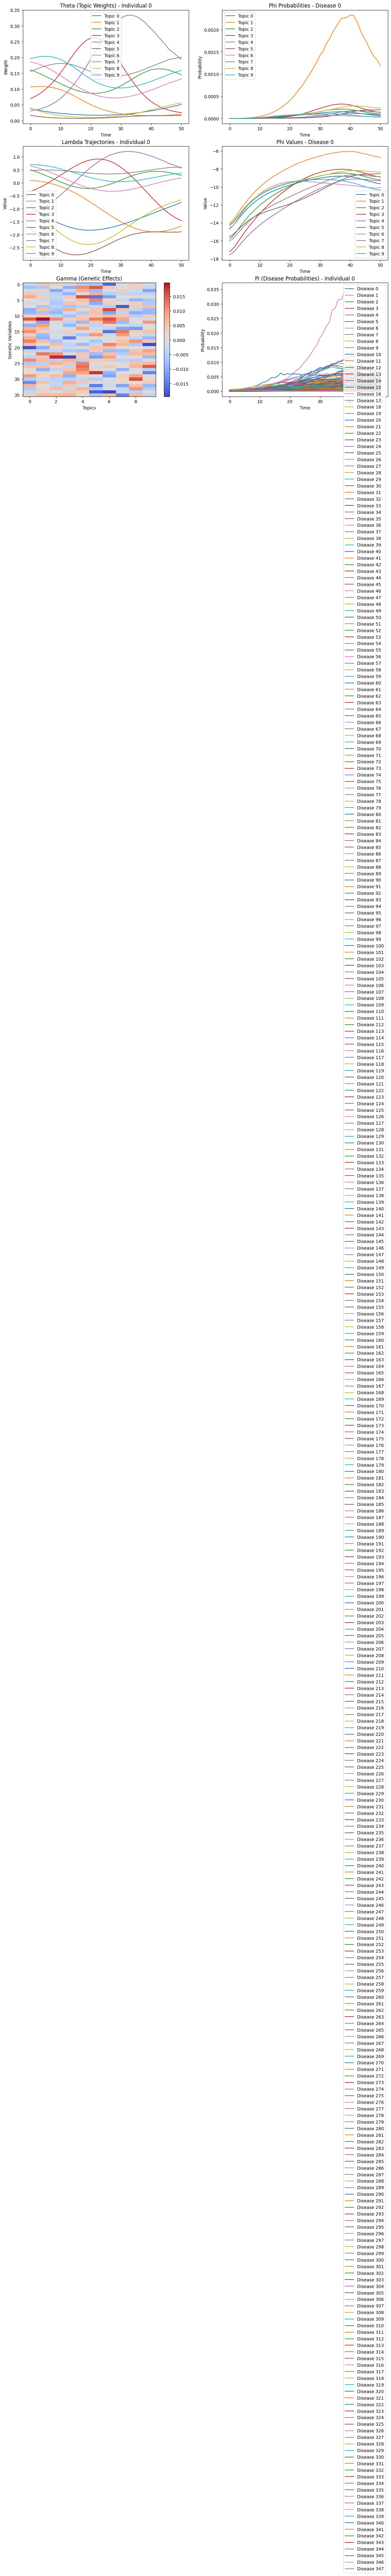

In [ ]:
pi_pred, theta_pred, phi_pred = model.forward()

# Plot predicted theta only
pi_pred, theta, phi_prob = model.forward()

# Convert predictions to numpy
pi_pred_np = pi_pred.detach().numpy()

fig, axes = plt.subplots(3, 2, figsize=(15, 16))  # Made taller for extra row

# 1. Plot theta (topic weights) for first few individuals
theta_np = theta.detach().numpy()
for k in range(K):
    axes[0, 0].plot(theta_np[0, k, :], label=f'Topic {k}')
axes[0, 0].set_title('Theta (Topic Weights) - Individual 0')
axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('Weight')
axes[0, 0].legend()

# 2. Plot phi probabilities for first few diseases
phi_prob_np = phi_prob.detach().numpy()
for k in range(K):
    axes[0, 1].plot(phi_prob_np[k, 0, :], label=f'Topic {k}')
axes[0, 1].set_title('Phi Probabilities - Disease 0')
axes[0, 1].set_xlabel('Time')
axes[0, 1].set_ylabel('Probability')
axes[0, 1].legend()

# 3. Plot lambda trajectories
lambda_np = model.lambda_.detach().numpy()
for k in range(K):
    axes[1, 0].plot(lambda_np[0, k, :], label=f'Topic {k}')
axes[1, 0].set_title('Lambda Trajectories - Individual 0')
axes[1, 0].set_xlabel('Time')
axes[1, 0].set_ylabel('Value')
axes[1, 0].legend()

# 4. Plot raw phi values
phi_np = model.phi.detach().numpy()
for k in range(K):
    axes[1, 1].plot(phi_np[k, 0, :], label=f'Topic {k}')
axes[1, 1].set_title('Phi Values - Disease 0')
axes[1, 1].set_xlabel('Time')
axes[1, 1].set_ylabel('Value')
axes[1, 1].legend()

# 5. Plot gamma (genetic effects) as heatmap
gamma_np = model.gamma.detach().numpy()
im = axes[2, 0].imshow(gamma_np, aspect='auto', cmap='coolwarm')
axes[2, 0].set_title('Gamma (Genetic Effects)')
axes[2, 0].set_xlabel('Topics')
axes[2, 0].set_ylabel('Genetic Variables')
plt.colorbar(im, ax=axes[2, 0])

# 6. Plot final survival probabilities for first individual
pi_np = pi_pred.detach().numpy()
for d in range(D):
    axes[2, 1].plot(pi_pred_np[0, d, :], label=f'Disease {d}')
axes[2, 1].set_title('Pi (Disease Probabilities) - Individual 0')
axes[2, 1].set_xlabel('Time')
axes[2, 1].set_ylabel('Probability')
axes[2, 1].legend()



plt.tight_layout()
plt.show()




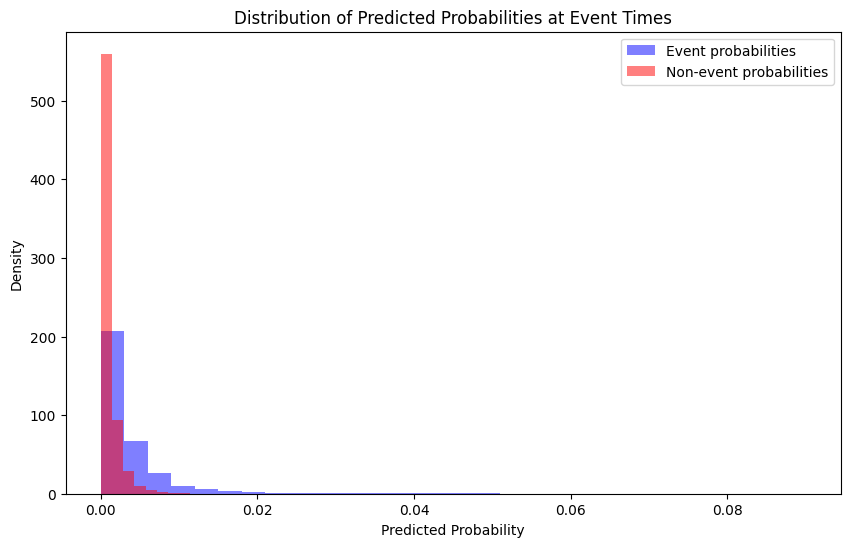

Mean probability at events: 0.004
Number of events: 105035
Mean probability at non-events: 0.001
Number of non-events: 3256993


In [ ]:
def evaluate_event_prediction(model, Y, E):
    """
    Evaluate how well the model predicts events
    """
    # Get predictions and convert everything to numpy
    pi_pred, _, _ = model.forward()
    pi_np = pi_pred.detach().numpy()
    Y_np = Y.detach().numpy()
    E_np = E.detach().numpy().astype(int)  # Convert to integer indices
    
    # Get probabilities at event times
    event_probs = []
    non_event_probs = []
    
    N, D, _ = Y_np.shape
    
    for i in range(N):
        for d in range(D):
            event_time = int(E_np[i,d])  # Ensure integer index
            try:
                if Y_np[i,d,event_time] == 1:  # If there's an event
                    event_probs.append(pi_np[i,d,event_time])
                else:
                    non_event_probs.append(pi_np[i,d,event_time])
            except IndexError:
                print(f"Warning: Index error at i={i}, d={d}, t={event_time}")
                continue
    
    # Plot distributions
    plt.figure(figsize=(10, 6))
    if event_probs:  # Only plot if we have events
        plt.hist(event_probs, alpha=0.5, label='Event probabilities', 
                density=True, bins=30, color='blue')
    if non_event_probs:  # Only plot if we have non-events
        plt.hist(non_event_probs, alpha=0.5, label='Non-event probabilities', 
                density=True, bins=30, color='red')
    
    plt.title('Distribution of Predicted Probabilities at Event Times')
    plt.xlabel('Predicted Probability')
    plt.ylabel('Density')
    plt.legend()
    plt.show()
    
    # Print summary statistics
    if event_probs:
        print(f"Mean probability at events: {np.mean(event_probs):.3f}")
        print(f"Number of events: {len(event_probs)}")
    if non_event_probs:
        print(f"Mean probability at non-events: {np.mean(non_event_probs):.3f}")
        print(f"Number of non-events: {len(non_event_probs)}")

# Use the function
evaluate_event_prediction(model, Y_tensor, E_tensor)

In [ ]:
import rpy2.robjects as robjects
import pandas as pd
from rpy2.robjects import pandas2ri

# Activate automatic conversion between R and Pandas DataFrames
pandas2ri.activate()

# Load the metadata from R
disease_names = pd.DataFrame(robjects.r['readRDS']('/Users/sarahurbut/Dropbox (Personal)/disease_names.rds'))
prs_names = pd.DataFrame(robjects.r['readRDS']('/Users/sarahurbut/Dropbox (Personal)/prs_names.rds'))

# Now we can create functions that use these names in our visualizations
def plot_phi_heatmaps_with_labels(phi_pred, K, D, T, disease_names):
    """
    Plot heatmaps of phi values for each topic with disease labels
    """
    phi_np = phi_pred.detach().numpy()
    
    fig, axes = plt.subplots(K, 1, figsize=(15, 4*K))
    if K == 1:
        axes = [axes]
    
    for k in range(K):
        im = axes[k].imshow(phi_np[k], aspect='auto', cmap='RdBu_r')
        plt.colorbar(im, ax=axes[k])
        
        axes[k].set_title(f'Topic {k} Disease Patterns')
        axes[k].set_xlabel('Time')
        axes[k].set_ylabel('Disease')
        
        # Use disease names instead of numbers
        axes[k].set_yticks(range(D))
        axes[k].set_yticklabels(disease_names)
        
        time_ticks = np.linspace(0, T-1, 5, dtype=int)
        axes[k].set_xticks(time_ticks)
        axes[k].set_xticklabels(time_ticks)
    
    plt.tight_layout()
    plt.show()

def analyze_genetic_effects_with_labels(model, G, prs_names):
    """
    Analyze and visualize genetic contributions with PRS labels
    """
    gamma_np = model.gamma.detach().numpy()
    
    plt.figure(figsize=(12, 8))
    
    # Heatmap with labeled axes
    im = plt.imshow(gamma_np, aspect='auto', cmap='RdBu_r')
    plt.colorbar(im)
    
    plt.title('Genetic Effects per Topic')
    plt.xlabel('Topics')
    plt.ylabel('PRS Traits')
    
    # Add PRS labels
    plt.yticks(range(len(prs_names)), prs_names)
    plt.xticks(range(model.K), [f'Topic {k}' for k in range(model.K)])
    
    # Rotate labels if needed
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    
    plt.tight_layout()
    plt.show()
    
    # Print top associations
    print("\nTop PRS associations per topic:")
    for k in range(model.K):
        print(f"\nTopic {k}:")
        # Get top positive associations
        top_pos_idx = np.argsort(gamma_np[:, k])[-3:]
        print("Top positive associations:")
        for idx in top_pos_idx:
            print(f"  {prs_names[idx]}: {gamma_np[idx, k]:.3f}")
        
        # Get top negative associations
        top_neg_idx = np.argsort(gamma_np[:, k])[:3]
        print("Top negative associations:")
        for idx in top_neg_idx:
            print(f"  {prs_names[idx]}: {gamma_np[idx, k]:.3f}")

In [ ]:
# If using pandas:
disease_names_list = disease_names[0].tolist()

prs_names_list = prs_names[0].tolist()

# Or if you want it as a numpy array:
disease_names_array = disease_names[0].values

# Print first few to verify
print("First few disease names:")
for i, name in enumerate(disease_names_list[:5]):
    print(f"{i}: {name}")

First few disease names:
0: Chronic prostatitis
1: Gastrointestinal complications
2: Other peripheral nerve disorders
3: Peritonitis and retroperitoneal infections
4: Hyperplasia of prostate


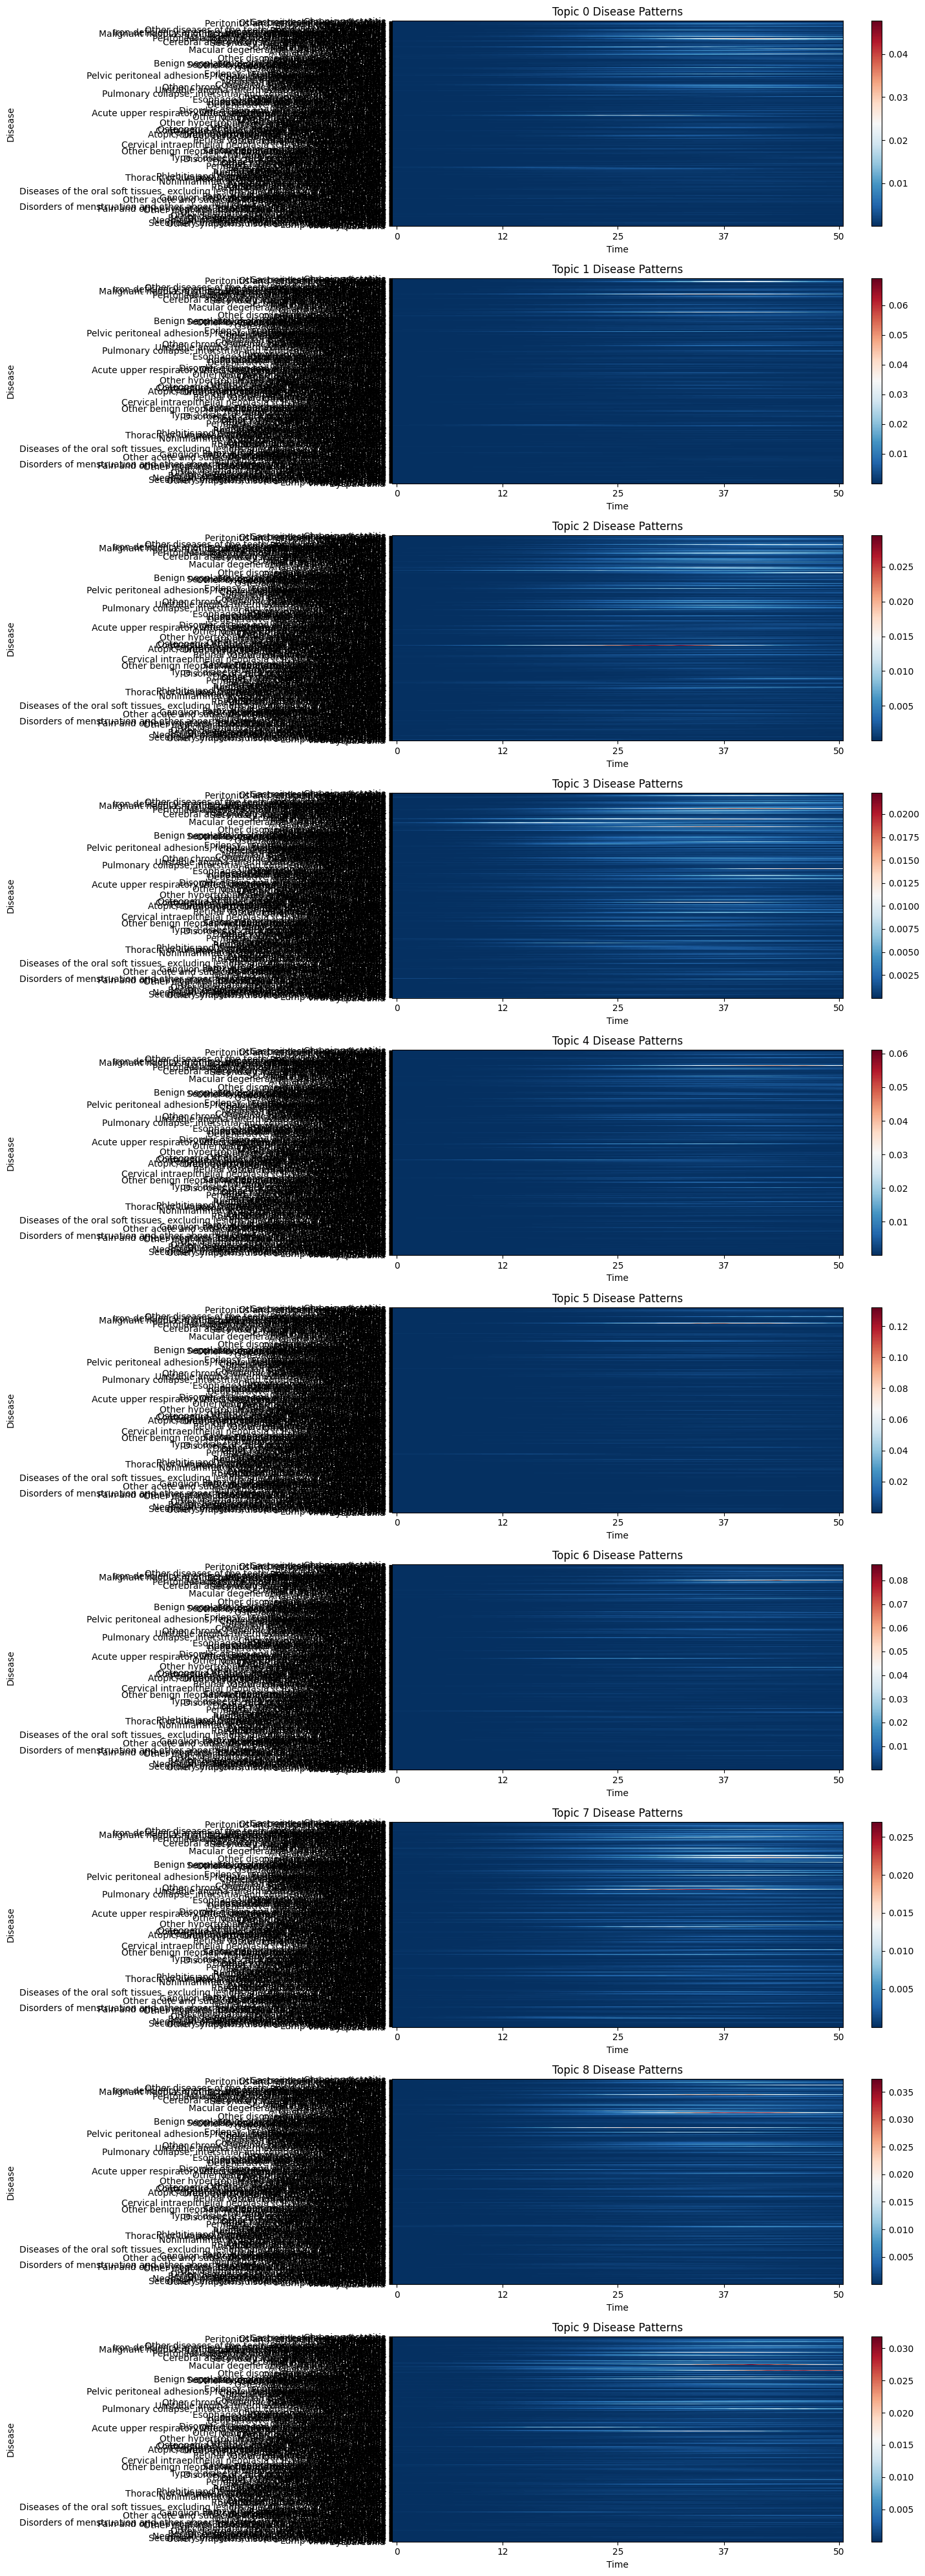

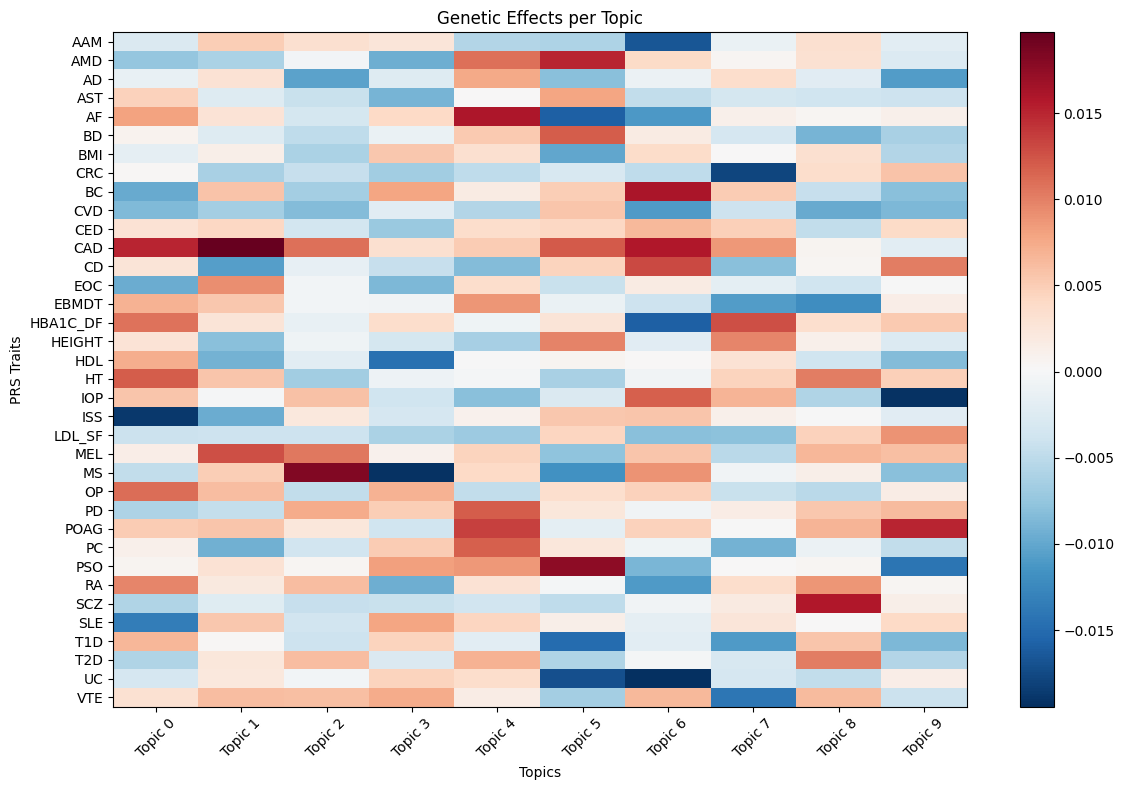


Top PRS associations per topic:

Topic 0:
Top positive associations:
  OP: 0.011
  HT: 0.012
  CAD: 0.015
Top negative associations:
  ISS: -0.019
  SLE: -0.013
  BC: -0.010

Topic 1:
Top positive associations:
  EOC: 0.009
  MEL: 0.013
  CAD: 0.020
Top negative associations:
  CD: -0.011
  ISS: -0.010
  PC: -0.009

Topic 2:
Top positive associations:
  MEL: 0.010
  CAD: 0.011
  MS: 0.018
Top negative associations:
  AD: -0.010
  CVD: -0.008
  HT: -0.007

Topic 3:
Top positive associations:
  BC: 0.008
  SLE: 0.008
  PSO: 0.008
Top negative associations:
  MS: -0.019
  HDL: -0.014
  RA: -0.009

Topic 4:
Top positive associations:
  PD: 0.012
  POAG: 0.013
  AF: 0.016
Top negative associations:
  CD: -0.008
  IOP: -0.008
  LDL_SF: -0.007

Topic 5:
Top positive associations:
  CAD: 0.012
  AMD: 0.015
  PSO: 0.018
Top negative associations:
  UC: -0.017
  AF: -0.016
  T1D: -0.015

Topic 6:
Top positive associations:
  CD: 0.013
  CAD: 0.016
  BC: 0.016
Top negative associations:
  UC: -0

In [ ]:
# Plot with disease labels
plot_phi_heatmaps_with_labels(phi_pred, K, D, T, disease_names_list)

# Analyze genetic effects with PRS labels
analyze_genetic_effects_with_labels(model, G, prs_names_list)

In [ ]:
def print_top_diseases_by_timepoint(phi_pred, disease_names_list, time_points=[0, 5, 10, 15, 20, 25, 30], n_top=10):
    """
    Print top diseases for each topic at specified time points
    
    Parameters:
    phi_pred: tensor from model (K×D×T)
    disease_names_list: list of disease names
    time_points: list of time points to analyze
    n_top: number of top diseases to show
    """
    phi_np = phi_pred.detach().numpy()
    K, D, T = phi_np.shape
    
    # Ensure time points are valid
    valid_time_points = [t for t in time_points if t < T]
    
    for k in range(K):
        print(f"\n\nTopic {k}")
        print("=" * 50)
        
        for t in valid_time_points:
            print(f"\nTime point {t}")
            print("-" * 30)
            
            # Get probabilities for this topic and time point
            probs = phi_np[k, :, t]
            
            # Get indices of top diseases
            top_indices = np.argsort(probs)[-n_top:][::-1]
            
            # Print top diseases and their probabilities
            for i, idx in enumerate(top_indices, 1):
                print(f"{i}. {disease_names_list[idx]}: {probs[idx]:.3f}")

# Use the function
pi_pred, theta_pred, phi_pred = model.forward()
print_top_diseases_by_timepoint(phi_pred, disease_names_list)



Topic 0

Time point 0
------------------------------
1. Excessive or frequent menstruation: 0.001
2. Inguinal hernia: 0.001
3. Asthma: 0.001
4. Pelvic peritoneal adhesions, female (postoperative) (postinfection): 0.000
5. Sebaceous cyst: 0.000
6. Hemorrhage of rectum and anus: 0.000
7. Urinary tract infection: 0.000
8. Abdominal pain: 0.000
9. Endometriosis: 0.000
10. Dysmenorrhea: 0.000

Time point 5
------------------------------
1. Excessive or frequent menstruation: 0.002
2. Asthma: 0.001
3. Hypothyroidism NOS: 0.001
4. Sebaceous cyst: 0.001
5. Pelvic peritoneal adhesions, female (postoperative) (postinfection): 0.001
6. Abdominal pain: 0.001
7. Hemorrhage of rectum and anus: 0.001
8. Inguinal hernia: 0.001
9. Urinary tract infection: 0.001
10. Alcoholic liver damage: 0.001

Time point 10
------------------------------
1. Excessive or frequent menstruation: 0.004
2. Hypothyroidism NOS: 0.003
3. Asthma: 0.002
4. Abdominal pain: 0.002
5. Pelvic peritoneal adhesions, female (postope

In [ ]:
def print_top_diseases_by_timepoint(phi_pred, disease_names_list, prevalence, time_points=[0, 5, 10, 15, 20, 25, 30], n_top=10):
    """
    Print top diseases for each topic at specified time points, showing deviation from population prevalence
    
    Parameters:
    phi_pred: tensor from model (K×D×T)
    disease_names_list: list of disease names
    prevalence: tensor or numpy array of disease prevalences (D×T)
    time_points: list of time points to analyze
    n_top: number of top diseases to show
    """
    # Convert phi_pred to numpy
    phi_np = phi_pred.detach().numpy()
    
    # Convert prevalence to numpy if it's a tensor
    if torch.is_tensor(prevalence):
        prev_np = prevalence.detach().numpy()
    else:
        prev_np = prevalence
    
    K, D, T = phi_np.shape
    
    # Ensure time points are valid
    valid_time_points = [t for t in time_points if t < T]
    
    for k in range(K):
        print(f"\n\nTopic {k}")
        print("=" * 50)
        
        for t in valid_time_points:
            print(f"\nTime point {t}")
            print("-" * 30)
            
            # Get probabilities for this topic and time point
            probs = phi_np[k, :, t]
            
            # Get prevalence for this time point
            prev_t = prev_np[:, t]
            
            # Calculate deviation from population prevalence
            deviation = probs - prev_t
            
            # Get indices of top diseases by absolute deviation
            top_indices = np.argsort(np.abs(deviation))[-n_top:][::-1]
            
            # Print top diseases and their deviations
            for i, idx in enumerate(top_indices, 1):
                print(f"{i}. {disease_names_list[idx]}")
                print(f"   Deviation from prevalence: {deviation[idx]:.3f}")
                print(f"   Topic probability: {probs[idx]:.3f}")
                print(f"   Population prevalence: {prev_t[idx]:.3f}")

# Now try running it again
pi_pred, theta_pred, phi_pred = model.forward()
print_top_diseases_by_timepoint(phi_pred, disease_names_list, prevalence_t)



Topic 0

Time point 0
------------------------------
1. Inguinal hernia
   Deviation from prevalence: 0.000
   Topic probability: 0.001
   Population prevalence: 0.000
2. Excessive or frequent menstruation
   Deviation from prevalence: 0.000
   Topic probability: 0.001
   Population prevalence: 0.000
3. Sebaceous cyst
   Deviation from prevalence: 0.000
   Topic probability: 0.000
   Population prevalence: 0.000
4. Pelvic peritoneal adhesions, female (postoperative) (postinfection)
   Deviation from prevalence: 0.000
   Topic probability: 0.000
   Population prevalence: 0.000
5. Urinary tract infection
   Deviation from prevalence: 0.000
   Topic probability: 0.000
   Population prevalence: 0.000
6. Redundant prepuce and phimosis/BXO
   Deviation from prevalence: 0.000
   Topic probability: 0.000
   Population prevalence: 0.000
7. Osteoarthrosis, localized, primary
   Deviation from prevalence: 0.000
   Topic probability: 0.000
   Population prevalence: 0.000
8. Hypothyroidism NOS
  

In [ ]:
def summarize_topic_diseases(phi_pred, disease_names_list, prevalence, n_top=10):
    """
    Summarize the most characteristic diseases for each topic, considering both probability and deviation from prevalence
    """
    # Convert to numpy
    phi_np = phi_pred.detach().numpy()
    prev_np = prevalence if isinstance(prevalence, np.ndarray) else prevalence.detach().numpy()
    
    K, D, T = phi_np.shape
    
    for k in range(K):
        print(f"\n\nTopic {k}")
        print("=" * 50)
        
        # Average probability over time for each disease
        avg_probs = phi_np[k].mean(axis=1)  # Average across time
        avg_prev = prev_np.mean(axis=1)     # Average prevalence across time
        avg_deviation = avg_probs - avg_prev
        
        # Get indices of top diseases by average deviation
        top_indices = np.argsort(avg_deviation)[-n_top:][::-1]
        
        print("Most characteristic diseases:")
        for i, idx in enumerate(top_indices, 1):
            print(f"{i}. {disease_names_list[idx]}")
            print(f"   Average probability: {avg_probs[idx]:.3f}")
            print(f"   Average prevalence: {avg_prev[idx]:.3f}")
            print(f"   Average deviation: {avg_deviation[idx]:.3f}")

# Use the function
pi_pred, theta_pred, phi_pred = model.forward()
summarize_topic_diseases(phi_pred, disease_names_list, prevalence_t)



Topic 0
Most characteristic diseases:
1. Hypercholesterolemia
   Average probability: 0.016
   Average prevalence: 0.005
   Average deviation: 0.011
2. Abdominal pain
   Average probability: 0.007
   Average prevalence: 0.001
   Average deviation: 0.006
3. Asthma
   Average probability: 0.007
   Average prevalence: 0.003
   Average deviation: 0.004
4. Hypothyroidism NOS
   Average probability: 0.006
   Average prevalence: 0.002
   Average deviation: 0.004
5. Enthesopathy
   Average probability: 0.005
   Average prevalence: 0.001
   Average deviation: 0.004
6. Diaphragmatic hernia
   Average probability: 0.007
   Average prevalence: 0.004
   Average deviation: 0.003
7. GERD
   Average probability: 0.006
   Average prevalence: 0.003
   Average deviation: 0.003
8. Colon cancer
   Average probability: 0.003
   Average prevalence: 0.001
   Average deviation: 0.003
9. Hemorrhage of gastrointestinal tract
   Average probability: 0.003
   Average prevalence: 0.001
   Average deviation: 0.003

In [ ]:
disease_names_list

['Chronic prostatitis',
 'Gastrointestinal complications',
 'Other peripheral nerve disorders',
 'Peritonitis and retroperitoneal infections',
 'Hyperplasia of prostate',
 'Diverticulosis',
 'Thrombocytopenia',
 'Other anemias',
 'Cardiomegaly',
 'Colon cancer',
 'Hypovolemia',
 'Pericarditis',
 'Pleurisy; pleural effusion',
 'Hypotension NOS',
 'Other diseases of the teeth and supporting structures',
 'Benign neoplasm of colon',
 'Pneumonia',
 'Hyposmolality and/or hyponatremia',
 'Iron deficiency anemias, unspecified or not due to blood loss',
 'Pneumococcal pneumonia',
 'Other specified gastritis',
 'Malignant neoplasm of rectum, rectosigmoid junction, and anus',
 'Esophagitis, GERD and related diseases',
 'Cancer of prostate',
 'Hemorrhage of gastrointestinal tract',
 'Other disorders of prostate',
 'Essential hypertension',
 'Malignant neoplasm of kidney, except pelvis',
 'Peritoneal adhesions (postoperative) (postinfection)',
 'Acute renal failure',
 'Hypercholesterolemia',
 'Pul

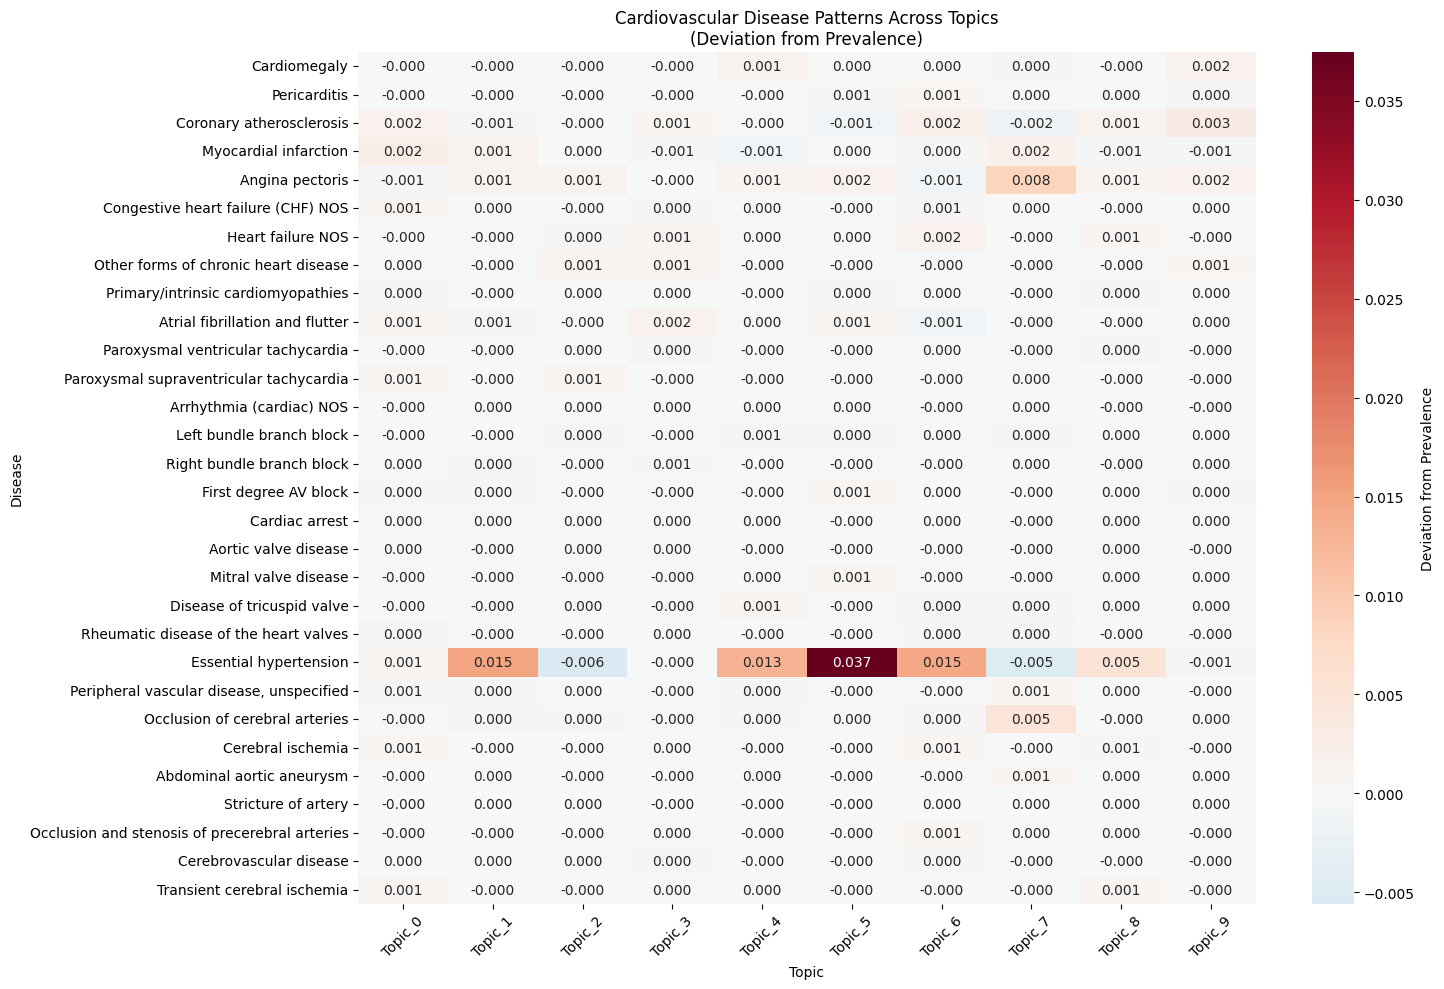


Summary of cardiovascular loading by topic:

Topic 0:
Mean deviation: 0.000
Max deviation: 0.002
Top 3 cardiovascular diseases:
                           Disease  Topic_0_dev
3            Myocardial infarction     0.002444
2         Coronary atherosclerosis     0.001712
9  Atrial fibrillation and flutter     0.000948

Topic 1:
Mean deviation: 0.001
Max deviation: 0.015
Top 3 cardiovascular diseases:
                   Disease  Topic_1_dev
21  Essential hypertension     0.014995
4          Angina pectoris     0.001350
3    Myocardial infarction     0.001219

Topic 2:
Mean deviation: -0.000
Max deviation: 0.001
Top 3 cardiovascular diseases:
                                    Disease  Topic_2_dev
4                           Angina pectoris     0.001307
7      Other forms of chronic heart disease     0.001071
11  Paroxysmal supraventricular tachycardia     0.000809

Topic 3:
Mean deviation: 0.000
Max deviation: 0.002
Top 3 cardiovascular diseases:
                                Diseas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_cv_topics(phi_pred, disease_names_list, prevalence):
    """
    Analyze cardiovascular disease patterns across topics
    """
    cv_categories = {
        'Heart Disease': ['Cardiomegaly', 'Pericarditis', 'Coronary atherosclerosis', 
                         'Myocardial infarction', 'Angina pectoris', 'Congestive heart failure (CHF) NOS',
                         'Heart failure NOS', 'Other forms of chronic heart disease',
                         'Primary/intrinsic cardiomyopathies', 'Other chronic ischemic heart disease'],
        'Arrhythmias': ['Atrial fibrillation and flutter', 'Paroxysmal ventricular tachycardia',
                        'Paroxysmal supraventricular tachycardia', 'Arrhythmia (cardiac) NOS',
                        'Left bundle branch block', 'Right bundle branch block', 'First degree AV block',
                        'Cardiac arrest'],
        'Valve Disease': ['Aortic valve disease', 'Mitral valve disease', 
                         'Disease of tricuspid valve', 'Rheumatic disease of the heart valves'],
        'Vascular Disease': ['Essential hypertension', 'Peripheral vascular disease, unspecified',
                            'Occlusion of cerebral arteries', 'Cerebral ischemia', 
                            'Abdominal aortic aneurysm', 'Stricture of artery',
                            'Occlusion and stenosis of precerebral arteries',
                            'Cerebrovascular disease', 'Transient cerebral ischemia']
    }
    
    # Convert to numpy arrays
    phi_np = phi_pred.detach().numpy()
    prev_np = prevalence if isinstance(prevalence, np.ndarray) else prevalence.detach().numpy()
    
    # Calculate average probabilities over time
    avg_probs = phi_np.mean(axis=2)  # Average across time
    avg_prev = prev_np.mean(axis=1)   # Average prevalence across time
    
    K = phi_np.shape[0]  # Number of topics
    
    # Create results DataFrame
    results = []
    for category, diseases in cv_categories.items():
        for disease in diseases:
            if disease in disease_names_list:
                idx = disease_names_list.index(disease)
                row = {
                    'Category': category,
                    'Disease': disease,
                    'Prevalence': avg_prev[idx]
                }
                # Add topic probabilities and deviations
                for k in range(K):
                    row[f'Topic_{k}_prob'] = avg_probs[k, idx]
                    row[f'Topic_{k}_dev'] = avg_probs[k, idx] - avg_prev[idx]
                results.append(row)
    
    df = pd.DataFrame(results)
    
    # Create heatmap of deviations
    plt.figure(figsize=(15, 10))
    
    # Prepare data for heatmap
    heatmap_data = pd.DataFrame(index=df['Disease'].unique())
    
    for k in range(K):
        heatmap_data[f'Topic_{k}'] = df[f'Topic_{k}_dev'].values
    
    # Create heatmap
    sns.heatmap(heatmap_data,
                cmap='RdBu_r',
                center=0,
                annot=True,
                fmt='.3f',
                cbar_kws={'label': 'Deviation from Prevalence'})
    
    plt.title('Cardiovascular Disease Patterns Across Topics\n(Deviation from Prevalence)')
    plt.xlabel('Topic')
    plt.ylabel('Disease')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\nSummary of cardiovascular loading by topic:")
    topic_scores = {}
    for k in range(K):
        dev_col = f'Topic_{k}_dev'
        mean_dev = df[dev_col].mean()
        max_dev = df[dev_col].max()
        top_diseases = df.nlargest(3, dev_col)[['Disease', dev_col]]
        
        topic_scores[k] = {
            'mean_deviation': mean_dev,
            'max_deviation': max_dev,
            'top_diseases': top_diseases
        }
        
        print(f"\nTopic {k}:")
        print(f"Mean deviation: {mean_dev:.3f}")
        print(f"Max deviation: {max_dev:.3f}")
        print("Top 3 cardiovascular diseases:")
        print(top_diseases)
    
    return df, topic_scores

# Use the function
pi_pred, theta_pred, phi_pred = model.forward()
cv_df, topic_scores = analyze_cv_topics(phi_pred, disease_names_list, prevalence_t)

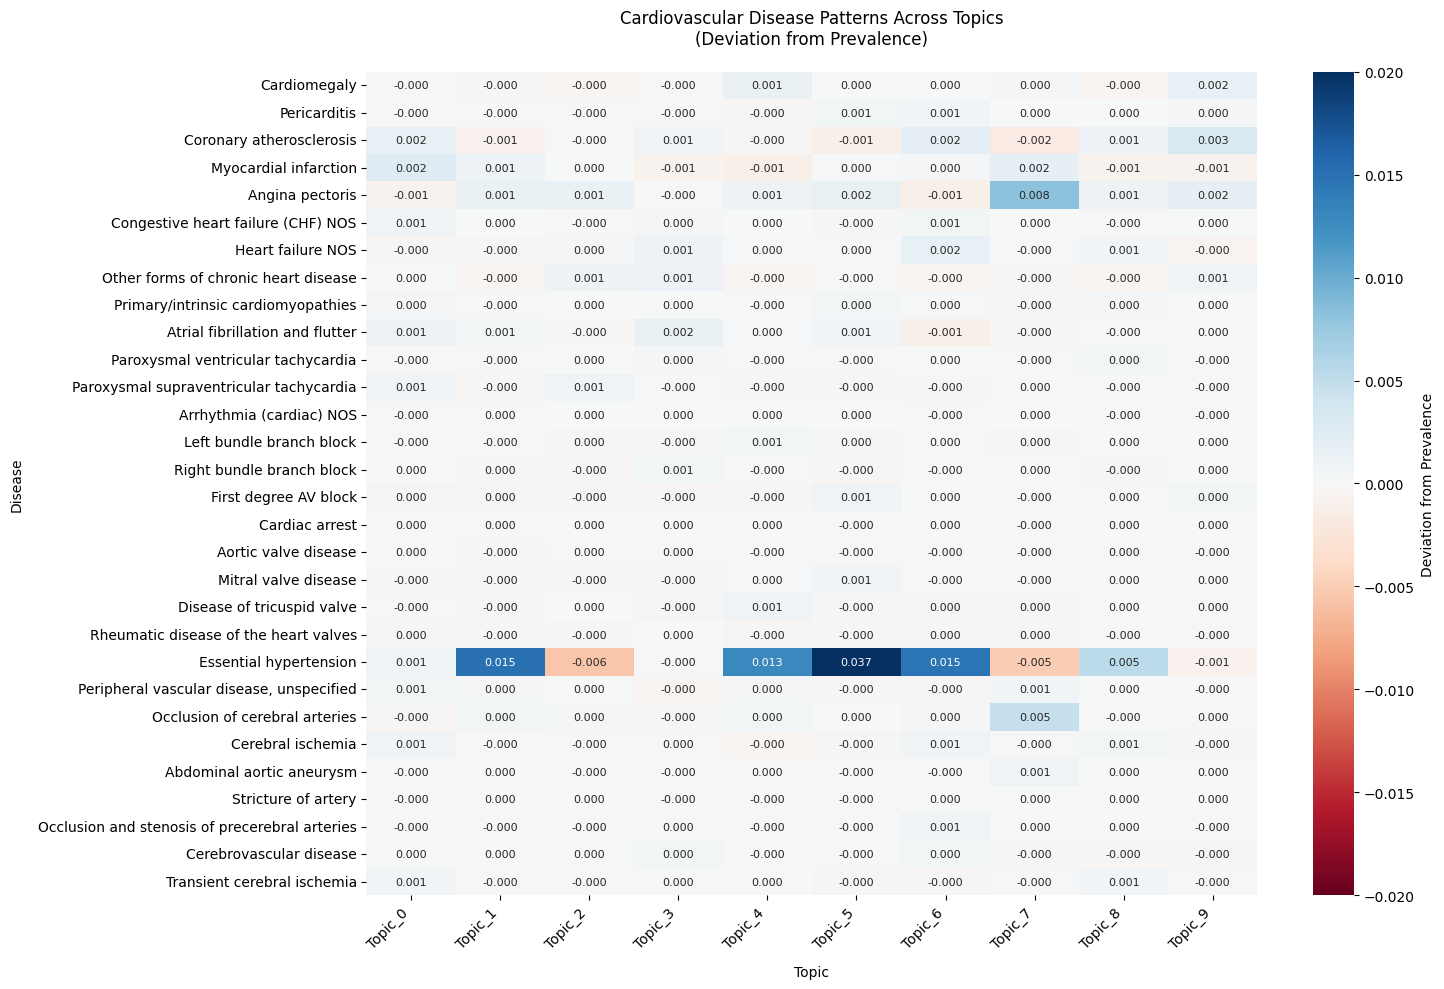


Summary of cardiovascular loading by topic:

Topic 0:
Mean deviation: 0.000
Max deviation: 0.002
Top 3 cardiovascular diseases:
                           Disease  Topic_0_dev
3            Myocardial infarction     0.002444
2         Coronary atherosclerosis     0.001712
9  Atrial fibrillation and flutter     0.000948

Topic 1:
Mean deviation: 0.001
Max deviation: 0.015
Top 3 cardiovascular diseases:
                   Disease  Topic_1_dev
21  Essential hypertension     0.014995
4          Angina pectoris     0.001350
3    Myocardial infarction     0.001219

Topic 2:
Mean deviation: -0.000
Max deviation: 0.001
Top 3 cardiovascular diseases:
                                    Disease  Topic_2_dev
4                           Angina pectoris     0.001307
7      Other forms of chronic heart disease     0.001071
11  Paroxysmal supraventricular tachycardia     0.000809

Topic 3:
Mean deviation: 0.000
Max deviation: 0.002
Top 3 cardiovascular diseases:
                                Diseas

In [ ]:
def analyze_cv_topics(phi_pred, disease_names_list, prevalence):
    """
    Analyze cardiovascular disease patterns across topics with improved visualization
    """
    cv_categories = {
        'Heart Disease': ['Cardiomegaly', 'Pericarditis', 'Coronary atherosclerosis', 
                         'Myocardial infarction', 'Angina pectoris', 'Congestive heart failure (CHF) NOS',
                         'Heart failure NOS', 'Other forms of chronic heart disease',
                         'Primary/intrinsic cardiomyopathies', 'Other chronic ischemic heart disease'],
        'Arrhythmias': ['Atrial fibrillation and flutter', 'Paroxysmal ventricular tachycardia',
                        'Paroxysmal supraventricular tachycardia', 'Arrhythmia (cardiac) NOS',
                        'Left bundle branch block', 'Right bundle branch block', 'First degree AV block',
                        'Cardiac arrest'],
        'Valve Disease': ['Aortic valve disease', 'Mitral valve disease', 
                         'Disease of tricuspid valve', 'Rheumatic disease of the heart valves'],
        'Vascular Disease': ['Essential hypertension', 'Peripheral vascular disease, unspecified',
                            'Occlusion of cerebral arteries', 'Cerebral ischemia', 
                            'Abdominal aortic aneurysm', 'Stricture of artery',
                            'Occlusion and stenosis of precerebral arteries',
                            'Cerebrovascular disease', 'Transient cerebral ischemia']
    }
    
    # Convert to numpy arrays
    phi_np = phi_pred.detach().numpy()
    prev_np = prevalence if isinstance(prevalence, np.ndarray) else prevalence.detach().numpy()
    
    # Calculate average probabilities over time
    avg_probs = phi_np.mean(axis=2)  # Average across time
    avg_prev = prev_np.mean(axis=1)   # Average prevalence across time
    
    K = phi_np.shape[0]  # Number of topics
    
    # Create results DataFrame
    results = []
    for category, diseases in cv_categories.items():
        for disease in diseases:
            if disease in disease_names_list:
                idx = disease_names_list.index(disease)
                row = {
                    'Category': category,
                    'Disease': disease,
                    'Prevalence': avg_prev[idx]
                }
                # Add topic probabilities and deviations
                for k in range(K):
                    row[f'Topic_{k}_prob'] = avg_probs[k, idx]
                    row[f'Topic_{k}_dev'] = avg_probs[k, idx] - avg_prev[idx]
                results.append(row)
    
    df = pd.DataFrame(results)
    
    # Prepare data for heatmap
    heatmap_data = pd.DataFrame(index=df['Disease'].unique())
    for k in range(K):
        heatmap_data[f'Topic_{k}'] = df[f'Topic_{k}_dev'].values
    
    # Create improved heatmap
    plt.figure(figsize=(15, 10))
    
    sns.heatmap(heatmap_data,
                cmap='RdBu',           # More distinct red-blue colormap
                center=0,
                annot=True,
                fmt='.3f',
                vmin=-0.02,            # Set fixed range for better color contrast
                vmax=0.02,
                annot_kws={'size': 8}, # Adjust annotation text size
                cbar_kws={'label': 'Deviation from Prevalence'})
    
    # Improve readability
    plt.title('Cardiovascular Disease Patterns Across Topics\n(Deviation from Prevalence)', pad=20)
    plt.xlabel('Topic', labelpad=10)
    plt.ylabel('Disease', labelpad=10)
    
    # Rotate labels for better readability
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\nSummary of cardiovascular loading by topic:")
    topic_scores = {}
    for k in range(K):
        dev_col = f'Topic_{k}_dev'
        mean_dev = df[dev_col].mean()
        max_dev = df[dev_col].max()
        top_diseases = df.nlargest(3, dev_col)[['Disease', dev_col]]
        
        topic_scores[k] = {
            'mean_deviation': mean_dev,
            'max_deviation': max_dev,
            'top_diseases': top_diseases
        }
        
        print(f"\nTopic {k}:")
        print(f"Mean deviation: {mean_dev:.3f}")
        print(f"Max deviation: {max_dev:.3f}")
        print("Top 3 cardiovascular diseases:")
        print(top_diseases)
    
    return df, topic_scores

# Use the function
pi_pred, theta_pred, phi_pred = model.forward()
cv_df, topic_scores = analyze_cv_topics(phi_pred, disease_names_list, prevalence_t)